<a href="https://colab.research.google.com/github/JhonaGo/BI-Tools/blob/main/ODS8_Nacional_%26_Municipio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nacional

### pib & pib percapita

In [1]:
!pip install pandas openpyxl

In [2]:
import pandas as pd

# Specify the path to your Excel file
file_path = '/content/drive/MyDrive/ODS_8/1.1/pib_percapita.xlsx'

# Read the Excel file into a DataFrame
pib = pd.read_excel(file_path)

# erarse R in ciclo PIB
pib["ciclo"]= pib["ciclo"].str.replace("R","")

# Display the first few rows of the DataFrame
print(pib.head())

  ciclo                  edo         PIB  Poblacion
0  2015       Aguascalientes  294497.175    1344649
1  2015      Baja California  795080.747    3406162
2  2015  Baja California Sur  156072.034     730405
3  2015             Campeche  700310.741     917075
4  2015              Chiapas  364001.282    5386294


In [3]:
# select Baja California
pib_bc=pib[pib['edo']=='Baja California']

In [4]:
# plot pib percapita
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0.01, 'Fuente: INEGI')

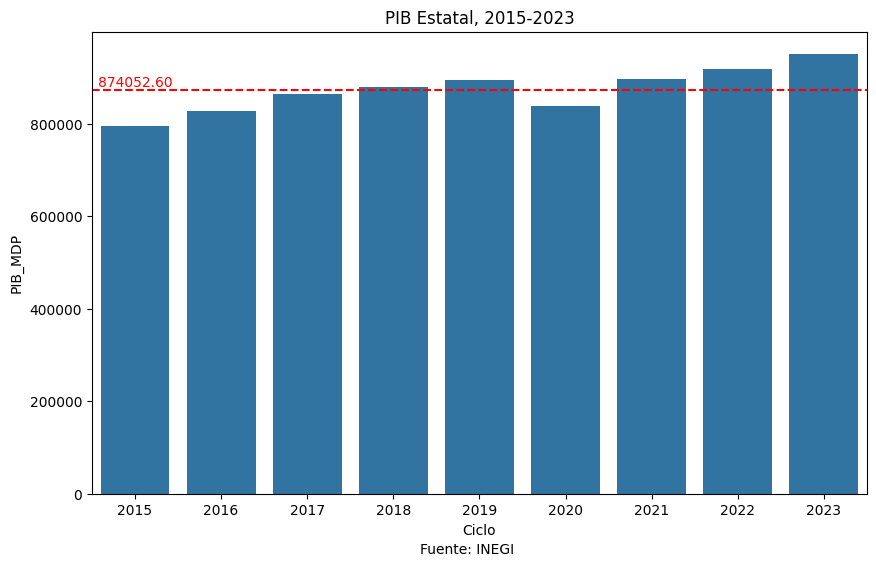

In [5]:
# line plot pib_percapita
plt.figure(figsize=(10, 6))
sns.barplot(x='ciclo', y='PIB', data=pib_bc)

# mean bar
mean_value = pib_bc['PIB'].mean()
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('PIB_MDP')
plt.title('PIB Estatal, 2015-2023')
plt.figtext(0.5, 0.01, "Fuente: INEGI", ha="center", fontsize=10)

In [6]:
grouped_desc= pib_bc[["PIB", "edo"]]
grouped_desc= round(grouped_desc.groupby('edo').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

PIB                                             \
                     mean       std        min        25%        50%   
edo                                                                    
Baja California  874052.6  48050.37  795080.75  839693.34  878816.87   

                                       
                       75%        max  
edo                                    
Baja California  896313.56  951029.43

In [7]:
pib_bc['Poblacion']=pib_bc['Poblacion']/1000

pib_bc["pib_percapita"]=pib_bc['PIB']/pib['Poblacion']

/tmp/ipython-input-58110006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_bc['Poblacion']=pib_bc['Poblacion']/1000
/tmp/ipython-input-58110006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_bc["pib_percapita"]=pib_bc['PIB']/pib['Poblacion']


Text(0.5, 0.01, 'Fuente: INEGI & CONAPO')

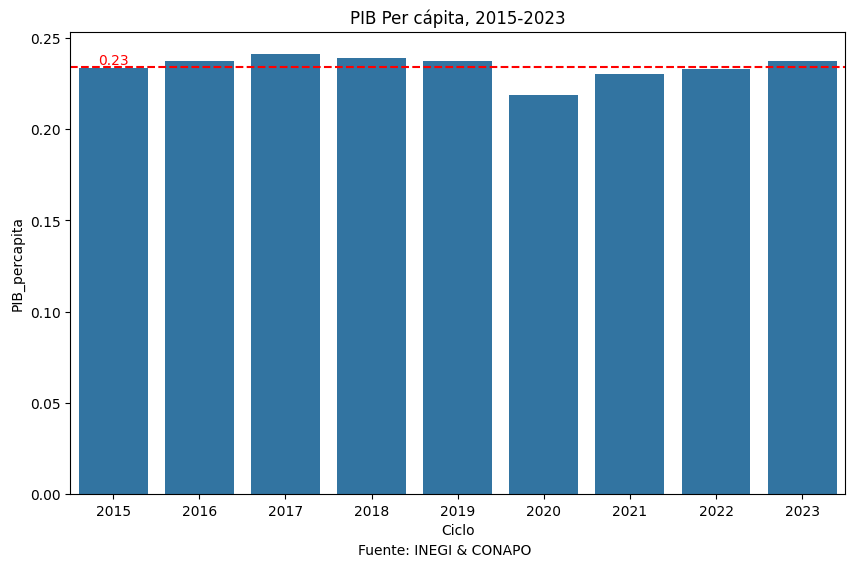

In [8]:
# bar plot pib_percapita
plt.figure(figsize=(10, 6))
sns.barplot(x='ciclo', y='pib_percapita', data=pib_bc)

# mean bar
mean_value = pib_bc['pib_percapita'].mean()
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('PIB_percapita')
plt.title('PIB Per cápita, 2015-2023')
plt.figtext(0.5, 0.01, "Fuente: INEGI & CONAPO", ha="center", fontsize=10)

In [9]:
grouped_desc= pib_bc[["pib_percapita", "edo"]]
grouped_desc= round(grouped_desc.groupby('edo').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

pib_percapita                                    
                         mean   std   min   25%   50%   75%   max
edo                                                              
Baja California          0.23  0.01  0.22  0.23  0.24  0.24  0.24

### PIB pea

In [10]:
# import cvs
pob = pd.read_csv('/content/drive/MyDrive/ODS_8/1.1/00_Pob_Mitad_1950_2070.csv')

pob.head()

,RENGLON,ANIO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION,ENTIDAD_FEDERATIVA,FECHA
0,4621,1970,Aguascalientes,1,0,Hombres,7450,Aguascalientes,1970-01-01
1,4622,1970,Aguascalientes,1,0,Mujeres,7251,Aguascalientes,1970-01-01
2,4623,1970,Aguascalientes,1,1,Hombres,7072,Aguascalientes,1970-01-01
3,4624,1970,Aguascalientes,1,1,Mujeres,6902,Aguascalientes,1970-01-01
4,4625,1970,Aguascalientes,1,2,Hombres,6849,Aguascalientes,1970-01-01


In [11]:
import numpy as np

# pivot table
pivot_table=pd.pivot_table(data=pob,
                           index=["ANIO", "ENTIDAD", "SEXO"],
                           values=["POBLACION"],
                           aggfunc=np.sum,
                           fill_value=0)

# transpose columns
pivot_table = pivot_table.pivot_table(index=['ANIO','ENTIDAD',], columns='SEXO', values='POBLACION', fill_value=0)

# and then sum columns
pivot_table["Total"]= pivot_table.sum(axis=1)

# pivot table to dataframe
pivot_table = pivot_table.reset_index()

pivot_table.head()

/tmp/ipython-input-1830662029.py:4: FutureWarning: The provided callable <function sum at 0x7e236bd4f880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table=pd.pivot_table(data=pob,


SEXO,ANIO,ENTIDAD,Hombres,Mujeres,Total
0,1970,Aguascalientes,179225.0,181937.0,361162.0
1,1970,Baja California,458634.0,458693.0,917327.0
2,1970,Baja California Sur,69679.0,66111.0,135790.0
3,1970,Campeche,137452.0,134933.0,272385.0
4,1970,Chiapas,867492.0,841925.0,1709417.0


In [12]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/1.1/pib_pea.xlsx'
sheet_name_to_import = 'promedios'

# Read the Excel file into a DataFrame
pea = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

# Key
pea['key'] = pea['ciclo'].astype(str) + ' - ' + pea['edo']

# Display the first few rows of the DataFrame
pea.tail()

,ciclo,edo,Valores,2.2.1. Población disponible,2.2.2. Población no disponible,2.2. Población no económicamente activa,2.1.2. Población desocupada,2.1.1. Población ocupada,2.1. Población económicamente activa,key
1051,2025,Yucatán,Mujeres,51530.0,407268.0,458798.0,11473.0,513477.0,524950.0,2025 - Yucatán
1052,2025,Yucatán,Total,75042.5,572698.0,647740.5,21534.5,1219281.0,1240815.5,2025 - Yucatán
1053,2025,Zacatecas,Hombres,18771.0,143453.5,162224.5,9148.5,415902.0,425050.5,2025 - Zacatecas
1054,2025,Zacatecas,Mujeres,42575.5,369283.0,411858.5,7428.0,253589.5,261017.5,2025 - Zacatecas
1055,2025,Zacatecas,Total,61346.5,512736.5,574083.0,16576.5,669491.5,686068.0,2025 - Zacatecas


In [13]:
# Key in PIB
pib["key"]= pib["ciclo"].astype(str) + " - " + pib["edo"]

# select columns
pib=pib[["key","PIB"]]

# joint pib_copy and pea
pea = pd.merge(pib, pea, on='key', how='left')

# chague values in ciclo to integer
#pea['ciclo']= pea['ciclo'].astype(int)

# drop columns in pea
pea = pea.drop(columns=['key'])

pea.tail()

,PIB,ciclo,edo,Valores,2.2.1. Población disponible,2.2.2. Población no disponible,2.2. Población no económicamente activa,2.1.2. Población desocupada,2.1.1. Población ocupada,2.1. Población económicamente activa
859,389502.137,2023,Yucatán,Mujeres,34132.75,426604.25,460737.00,11766.00,501411.25,513177.25
860,389502.137,2023,Yucatán,Total,56527.25,582852.25,639379.50,22576.25,1199233.50,1221809.75
861,228860.430,2023,Zacatecas,Hombres,16450.50,130179.75,146630.25,11668.50,411837.50,423506.00
862,228860.430,2023,Zacatecas,Mujeres,42649.00,344372.50,387021.50,8075.75,257670.00,265745.75
863,228860.430,2023,Zacatecas,Total,59099.50,474552.25,533651.75,19744.25,669507.50,689251.75


In [14]:
# pib by pea
pea["pib_pea"]=pea["PIB"]/pea["2.1. Población económicamente activa"]*1000

,PIB,ciclo,edo,Valores,2.2.1. Población disponible,2.2.2. Población no disponible,2.2. Población no económicamente activa,2.1.2. Población desocupada,2.1.1. Población ocupada,2.1. Población económicamente activa,pib_pea
0,294497.175,2015,Aguascalientes,Hombres,15039.75,83400.50,98440.25,16598.50,323843.50,340442.00,865.043605
1,294497.175,2015,Aguascalientes,Mujeres,33275.75,240750.25,274026.00,7914.50,195889.50,203804.00,1445.001938
2,294497.175,2015,Aguascalientes,Total,48315.50,324150.75,372466.25,24513.00,519733.00,544246.00,541.110408
3,795080.747,2015,Baja California,Hombres,56630.75,249679.00,306309.75,43923.00,943149.50,987072.50,805.493768
4,795080.747,2015,Baja California,Mujeres,80661.00,637413.75,718074.75,22587.00,586755.25,609342.25,1304.818018
...,...,...,...,...,...,...,...,...,...,...,...
859,389502.137,2023,Yucatán,Mujeres,34132.75,426604.25,460737.00,11766.00,501411.25,513177.25,759.001177
860,389502.137,2023,Yucatán,Total,56527.25,582852.25,639379.50,22576.25,1199233.50,1221809.75,318.791151
861,228860.430,2023,Zacatecas,Hombres,16450.50,130179.75,146630.25,11668.50,411837.50,423506.00,540.394776
862,228860.430,2023,Zacatecas,Mujeres,42649.00,344372.50,387021.50,8075.75,257670.00,265745.75,861.200715


Text(0.5, 0.01, 'Fuente: ENOE,INEGI ')

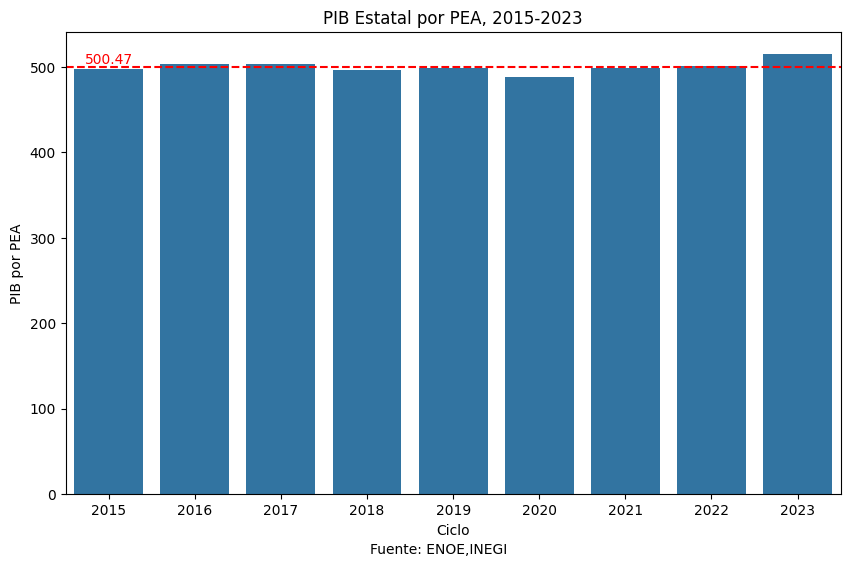

In [15]:
# filter baja california
pea_bc=pea[pea['edo']=='Baja California']
# filter total
pea_bc=pea_bc[pea_bc['Valores']=="Total"]

# float to integer in ciclo
pea['ciclo'] = pea['ciclo'].astype(int)

# bar plot pib_percapita
plt.figure(figsize=(10, 6))
sns.barplot(x='ciclo', y='pib_pea', data=pea_bc)

# mean bar
mean_value = pea_bc['pib_pea'].mean()
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('PIB por PEA')
plt.title('PIB Estatal por PEA, 2015-2023')
plt.figtext(0.5, 0.01, "Fuente: ENOE,INEGI ", ha="center", fontsize=10)

In [16]:
grouped_desc= pea_bc[["edo", "pib_pea"]]
grouped_desc= round(grouped_desc.groupby('edo').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

pib_pea                                             
                   mean   std     min     25%     50%    75%     max
edo                                                                 
Baja California  500.47  7.26  488.09  498.04  499.21  503.7  515.16

Text(0.5, 0.01, 'Fuente: ENOE,INEGI ')

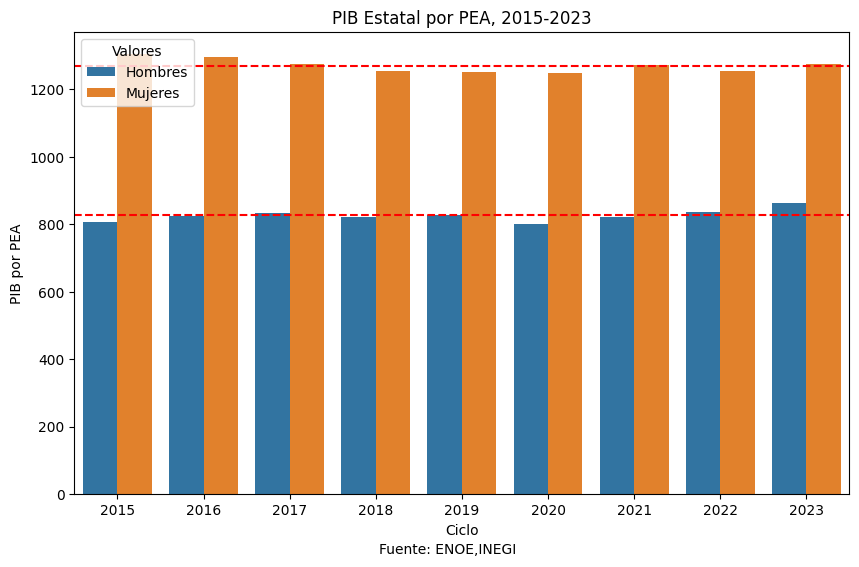

In [17]:
# filter baja california
pea_bc=pea[pea['edo']=='Baja California']
# filter total
pea_bc=pea_bc[pea_bc['Valores'] != "Total"]

# bar plot pib_percapita
plt.figure(figsize=(10, 6))
sns.barplot(x='ciclo', y='pib_pea',hue='Valores', data=pea_bc)

# mean bar by each hue
for hue_value in pea_bc['Valores'].unique():
    hue_data = pea_bc[pea_bc['Valores'] == hue_value]
    mean_value = hue_data['pib_pea'].mean()
    plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('PIB por PEA')
plt.title('PIB Estatal por PEA, 2015-2023')
plt.figtext(0.5, 0.01, "Fuente: ENOE,INEGI ", ha="center", fontsize=10)

### condiciones de empleo

In [37]:
# PNEA

# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/1.1/pib_pea.xlsx'
sheet_name_to_import = 'promedios'

# Read the Excel file into a DataFrame
pea = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

pea.tail()

,ciclo,edo,Valores,2.2.1. Población disponible,2.2.2. Población no disponible,2.2. Población no económicamente activa,2.1.2. Población desocupada,2.1.1. Población ocupada,2.1. Población económicamente activa
1051,2025,Yucatán,Mujeres,51530.0,407268.0,458798.0,11473.0,513477.0,524950.0
1052,2025,Yucatán,Total,75042.5,572698.0,647740.5,21534.5,1219281.0,1240815.5
1053,2025,Zacatecas,Hombres,18771.0,143453.5,162224.5,9148.5,415902.0,425050.5
1054,2025,Zacatecas,Mujeres,42575.5,369283.0,411858.5,7428.0,253589.5,261017.5
1055,2025,Zacatecas,Total,61346.5,512736.5,574083.0,16576.5,669491.5,686068.0


In [38]:
# filter baja california
pea_bc=pea[pea['edo']=='Baja California']
# filter total
pea_bc=pea_bc[pea_bc['Valores']=="Total"]

# select two variables
pea_bc=pea_bc[['ciclo', 'edo', 'Valores',"2.2. Población no económicamente activa", "2.1. Población económicamente activa"]]

# percentage
pea_bc["pob_prod"]= pea_bc["2.2. Población no económicamente activa"] + pea_bc["2.1. Población económicamente activa"]
pea_bc["perc_pea"] = (pea_bc["2.1. Población económicamente activa"] / pea_bc["pob_prod"]) * 100
pea_bc["perc_pnea"] = (pea_bc["2.2. Población no económicamente activa"] / pea_bc["pob_prod"]) * 100

In [39]:
# RAZONES DE CAMBIO Y CAGR

# razon de proporciones
pea_bc["ratio"] = pea_bc["2.1. Población económicamente activa"] / pea_bc["2.2. Población no económicamente activa"]

pea_bc["ratio"].median()

# last value of colum
pea_bc["ratio"].iloc[-1]

# first value of colum
pea_bc["ratio"].iloc[0]

# last value / first value ** (1/periodo)
print ('CAGR PNEA {:.2%} '.format((pea_bc["ratio"].iloc[-1]/pea_bc["ratio"].iloc[0])**(1/10)-1))

CAGR PNEA -0.50% 


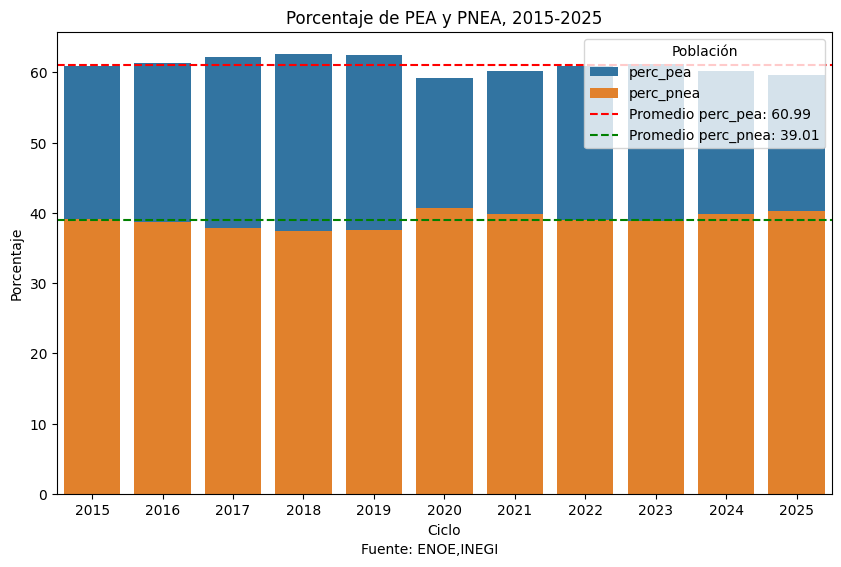

In [40]:
# Melt the DataFrame to long format for stacking
pea_bc_melted = pea_bc.melt(id_vars=['ciclo'], value_vars=['perc_pea', 'perc_pnea'], var_name='Población', value_name='Percentage')

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='ciclo', y='Percentage', hue='Población', data=pea_bc_melted, dodge=False) # dodge=False for stacking

# Add mean lines by each population type with different colors
colors = ['red', 'green'] # Define a list of colors for the mean lines
for i, pop_type in enumerate(pea_bc_melted['Población'].unique()):
    pop_type_data = pea_bc_melted[pea_bc_melted['Población'] == pop_type]
    mean_percentage = pop_type_data['Percentage'].mean()
    plt.axhline(y=mean_percentage,
                color=colors[i % len(colors)],
                linestyle='--',
                label=f'Promedio {pop_type}: {mean_percentage:.2f}')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de PEA y PNEA, 2015-2025')
plt.figtext(0.5, 0.01, "Fuente: ENOE,INEGI ", ha="center", fontsize=10)

# Add legend to show the mean lines
plt.legend(title='Población')

plt.show()

In [41]:
grouped_desc= pea_bc[["edo",
                      'Valores',"2.2. Población no económicamente activa",
                      "2.1. Población económicamente activa"]]
grouped_desc= round(grouped_desc.groupby('edo').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

2.2. Población no económicamente activa                       \
                                                   mean       std        min   
edo                                                                            
Baja California                              1125281.36  76370.69  1024384.5   

                                                                \
                        25%         50%         75%        max   
edo                                                              
Baja California  1049282.62  1171683.75  1185943.71  1212081.0   

                2.1. Población económicamente activa                        \
                                                mean       std         min   
edo                                                                          
Baja California                           1757848.36  80363.25  1596414.75   

                                                               
                        25%        50%         75%        max  
edo                                                            
Baja California  1716885.62  1793968.5  1810572.75  1846085.5

Text(0.5, 0.01, 'Fuente: ENOE,INEGI ')

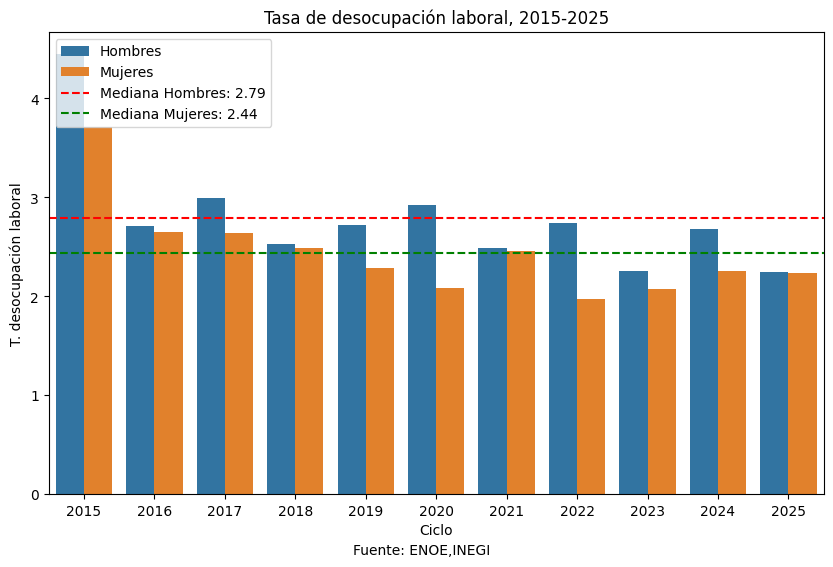

In [42]:
# PNEA
# filter baja california
pea_bc=pea[pea['edo']=='Baja California']
# filter total
pea_bc=pea_bc[pea_bc['Valores']!="Total"]

# Tasa de desempleo
pea_bc["tasa_desempleo"]= pea_bc['2.1.2. Población desocupada']/pea_bc['2.1. Población económicamente activa']*100

# bar plot pib_percapita
plt.figure(figsize=(10, 6))
sns.barplot(x='ciclo', y="tasa_desempleo", hue= "Valores", data=pea_bc)

# mean bar by each group with different colors
colors = ['red', 'green'] # Define a list of colors
for i, group_value in enumerate(pea_bc['Valores'].unique()):
    group_data = pea_bc[pea_bc['Valores'] == group_value]
    mean_value = group_data['tasa_desempleo'].mean()
    plt.axhline(y=mean_value,
                color=colors[i % len(colors)],
                linestyle='--',
                label= f'Mediana {group_value}: {mean_value:.2f}')

# changue lables of plot
ax = plt.gca() # Get the current Axes
ax.legend(loc='upper left', ncols=1) # Use ax to set the legend location
plt.xlabel('Ciclo')
plt.ylabel('T. desocupación laboral')
plt.title('Tasa de desocupación laboral, 2015-2025')
plt.figtext(0.5, 0.01, "Fuente: ENOE,INEGI ", ha="center", fontsize=10)

In [43]:
grouped_desc= pea_bc[["Valores",
                      "tasa_desempleo"]]
grouped_desc= round(grouped_desc.groupby('Valores').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

tasa_desempleo                                    
                  mean   std   min   25%   50%   75%   max
Valores                                                   
Hombres           2.79  0.60  2.24  2.51  2.71  2.83  4.45
Mujeres           2.44  0.48  1.97  2.16  2.29  2.57  3.71

In [44]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/1.2/horas_ingreso.xlsx'
sheet_name_to_import = 'promedios'

# Read the Excel file into a DataFrame
hr_ing = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

# Display the first few rows of the DataFrame
hr_ing.head()

,ciclo,estado,valor,9.4.2. Ingresos (pesos) por hora trabajada de la población ocupada (Mediana),9.4.1. Ingresos (pesos) por hora trabajada de la población ocupada (Promedio),9.3.2. Horas trabajadas a la semana por la población ocupada (Mediana),9.3.1. Horas trabajadas a la semana por la población ocupada (Promedio),9.1.2. Edad de la población económicamente activa (Mediana),9.1.1. Edad de la población económicamente activa (Promedio)
0,2015,Aguascalientes,Hombres,22.888793,29.896480,48.0,49.287970,36.00,37.425300
1,2015,Aguascalientes,Mujeres,23.457757,32.084685,40.0,39.392165,35.75,37.027417
2,2015,Aguascalientes,Total,23.148325,30.717057,48.0,45.570323,36.00,37.276625
3,2015,Baja California,Hombres,27.352112,37.254770,48.0,46.721305,37.00,37.958930
4,2015,Baja California,Mujeres,25.000000,35.422227,44.5,40.494675,37.25,37.929620


/tmp/ipython-input-2493638209.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hr_ing_bc=hr_ing_bc[hr_ing['valor']=="Total"]


Text(0.5, 0.01, 'Fuente: ENOE,INEGI ')

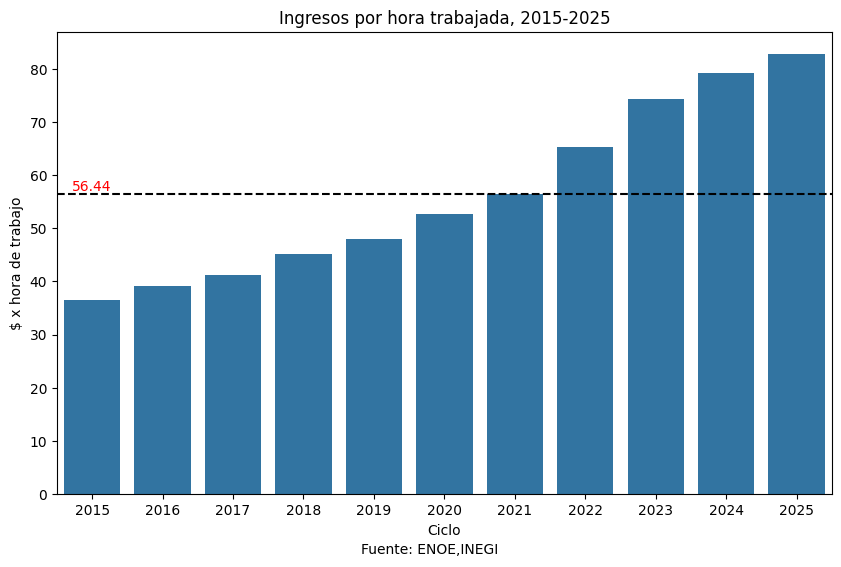

In [45]:
# filter baja california
hr_ing_bc=hr_ing[hr_ing['estado']=='Baja California']
# filter total
hr_ing_bc=hr_ing_bc[hr_ing['valor']=="Total"]

# bar plot pib_percapita
plt.figure(figsize=(10, 6))
sns.barplot(x='ciclo',
            y="9.4.1. Ingresos (pesos) por hora trabajada de la población ocupada (Promedio)",
            capsize=0.2,
            data=hr_ing_bc)

# mean bar
mean_value = hr_ing_bc["9.4.1. Ingresos (pesos) por hora trabajada de la población ocupada (Promedio)"].mean()
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('$ x hora de trabajo')
plt.title('Ingresos por hora trabajada, 2015-2025')
plt.figtext(0.5, 0.01, "Fuente: ENOE,INEGI ", ha="center", fontsize=10)

In [46]:
grouped_desc= hr_ing_bc[["estado", "9.4.1. Ingresos (pesos) por hora trabajada de la población ocupada (Promedio)"]]
grouped_desc= round(grouped_desc.groupby('estado').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

9.4.1. Ingresos (pesos) por hora trabajada de la población ocupada (Promedio)  \
                                                                                         mean   
estado                                                                                          
Baja California                                              56.44                              

                                                           
                   std    min    25%    50%    75%    max  
estado                                                     
Baja California  16.57  36.55  43.17  52.77  69.82  82.78

In [47]:
hr_ing_bc.describe()

,ciclo,9.4.2. Ingresos (pesos) por hora trabajada de la población ocupada (Mediana),9.4.1. Ingresos (pesos) por hora trabajada de la población ocupada (Promedio),9.3.2. Horas trabajadas a la semana por la población ocupada (Mediana),9.3.1. Horas trabajadas a la semana por la población ocupada (Promedio),9.1.2. Edad de la población económicamente activa (Mediana),9.1.1. Edad de la población económicamente activa (Promedio)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2020.000000,43.114380,56.444464,45.825758,43.642859,37.836490,38.709032
std,3.316625,14.318621,16.573678,0.772311,0.510213,0.502821,0.540251
min,2015.000000,26.452735,36.549450,45.000000,42.792515,37.000000,37.947550
25%,2017.500000,31.882266,43.165341,45.000000,43.344309,37.429891,38.169081
50%,2020.000000,39.278393,52.771467,46.250000,43.707625,38.000000,38.933525
75%,2022.500000,53.614225,69.824801,46.416667,44.017557,38.000000,39.142990
max,2025.000000,66.666670,82.779275,47.000000,44.305195,38.591607,39.317618


In [58]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/1.2/concentrado.xlsx'
sheet_name_to_import = 'promedios'

# Read the Excel file into a DataFrame
cond_lab = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

# Display the first few rows of the DataFrame
cond_lab.head()

,ciclo,estado,valor,6.4.3. Terciario,6.4.2. Secundario,6.4.1. Primario,6.4. Población subocupada por sector de actividad económica,6.1.2. Sin búsqueda de trabajo adicional,6.1.1. Con búsqueda de trabajo adicional,6.1. Población subocupada por condición de búsqueda de trabajo adicional,...,4.4.2. Sin acceso,4.4.1. Con acceso,4.4. Trabajadores subordinados y remunerados por condición de acceso a las instituciones de salud,4.2.6. No especificado,4.2.5. Más de 5 salarios mínimos,4.2.4. Más de 3 hasta 5 salarios mínimos,4.2.3. Más de 2 hasta 3 salarios mínimos,4.2.2. Más de 1 hasta 2 salarios mínimos,4.2.1. Hasta un salario mínimo,4.2. Trabajadores subordinados y remunerados por nivel de ingresos
0,2015,Aguascalientes,Hombres,5253.25,3106.75,1120.00,9603.50,8314.50,1289.00,9603.50,...,83690.75,169707.5,254466.25,67284.5,15934.25,39071.00,72481.25,52015.75,7679.5,254466.25
1,2015,Aguascalientes,Mujeres,3693.25,373.50,65.25,4132.00,3532.75,599.25,4132.00,...,55018.25,96397.5,152329.75,40691.0,7939.50,17486.00,25728.50,47984.25,12500.5,152329.75
2,2015,Aguascalientes,Total,8946.50,3480.25,1185.25,13735.50,11847.25,1888.25,13735.50,...,138709.00,266105.0,406796.00,107975.5,23873.75,56557.00,98209.75,100000.00,20180.0,406796.00
3,2015,Baja California,Hombres,12995.25,10455.00,1752.50,27453.50,25585.00,1868.50,27453.50,...,188802.75,498283.5,733507.25,102992.0,71273.50,158775.25,257410.25,123140.25,19916.0,733507.25
4,2015,Baja California,Mujeres,10480.25,969.00,221.25,11894.25,11076.00,818.25,11894.25,...,113953.50,325600.5,454334.25,58941.0,32026.50,68602.25,162157.25,113664.25,18943.0,454334.25


In [59]:
cond_lab.columns

Index(['ciclo', 'estado', 'valor', '6.4.3. Terciario', '6.4.2. Secundario',
       '6.4.1. Primario',
       '6.4. Población subocupada por sector de actividad económica',
       '6.1.2. Sin búsqueda de trabajo adicional',
       '6.1.1. Con búsqueda de trabajo adicional',
       '6.1. Población subocupada por condición de búsqueda de trabajo adicional',
       '4.6.3. No especificado', '4.6.1.1. Temporal',
       '4.6.1.2. De base, planta o por tiempo indefinido',
       'Sin contrato escrito', '4.6.1.3. Contrato de tipo no especificado',
       '4.6.1. Con contrato escrito',
       '4.6. Trabajadores subordinados y remunerados por disponibilidad de contrato escrito',
       '4.5.3. No especificado', '4.5.2. Sin prestaciones',
       '4.5.1. Con prestaciones',
       '4.5. Trabajadores subordinados y remunerados por prestaciones laborales (sin considerar el acceso a las instituciones de salud)',
       '4.4.3. No especificado', '4.4.2. Sin acceso', '4.4.1. Con acceso',
       '4.4. Tr

In [60]:
######

# RAZONES DE CAMBIO Y CAGR
cond_lab=cond_lab[cond_lab['estado']=='Baja California']
cond_lab=cond_lab[cond_lab['valor']=="Total"]

# razon de proporciones
cond_lab["ratio_subocupado"] =  cond_lab["4.6.1. Con contrato escrito"] / (cond_lab["Sin contrato escrito"] +cond_lab["4.6.1.3. Contrato de tipo no especificado"])

print("mediana{:.2}".format(cond_lab["ratio_subocupado"].median()))

# last value of colum
cond_lab["ratio_subocupado"].iloc[-1]

# first value of colum
cond_lab["ratio_subocupado"].iloc[0]

# last value / first value ** (1/periodo)
print ('CAGR {:.2%} '.format((cond_lab["ratio_subocupado"].iloc[-1]/cond_lab["ratio_subocupado"].iloc[0])**(1/10)-1))

##########

mediana2.7
CAGR 1.77% 


In [64]:
#1 subocupacion
cond_lab_bc=cond_lab[cond_lab['estado']=='Baja California']
cond_lab_bc=cond_lab_bc[cond_lab_bc['valor']!="Total"] # Keep all values (Hombres, Mujeres, Total) for grouping by valor later


# variables
cond_lab_bc["razon_contrato"] = cond_lab_bc["4.6.1. Con contrato escrito"] / cond_lab_bc["Sin contrato escrito"]
cond_lab_bc["razon_prestaciones"] = cond_lab_bc["4.5.1. Con prestaciones"] / cond_lab_bc["4.5.2. Sin prestaciones"]
cond_lab_bc["razon_acceso"] = cond_lab_bc["4.4.1. Con acceso"]/cond_lab_bc["4.4.2. Sin acceso"]

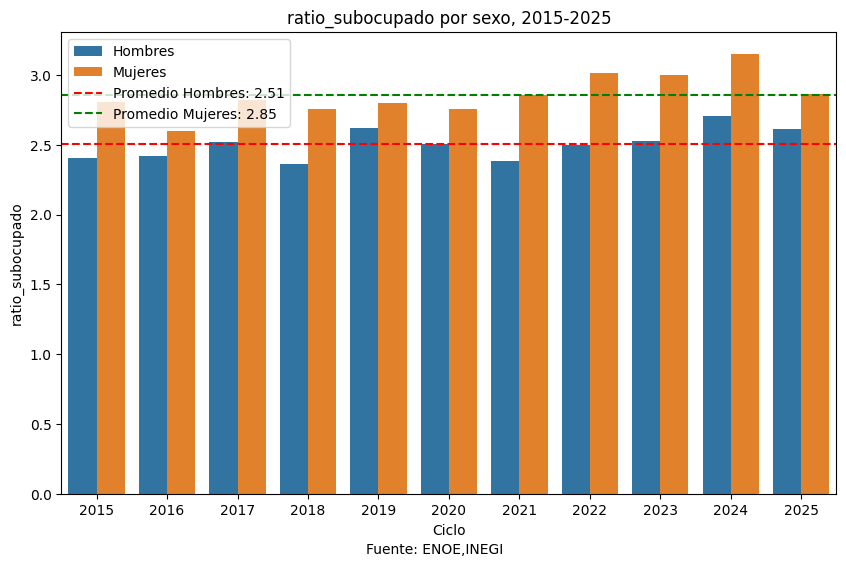

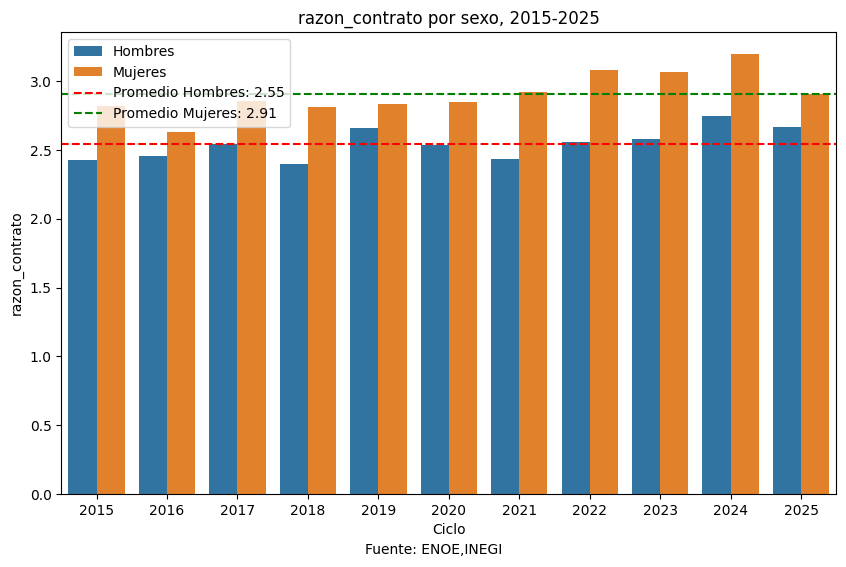

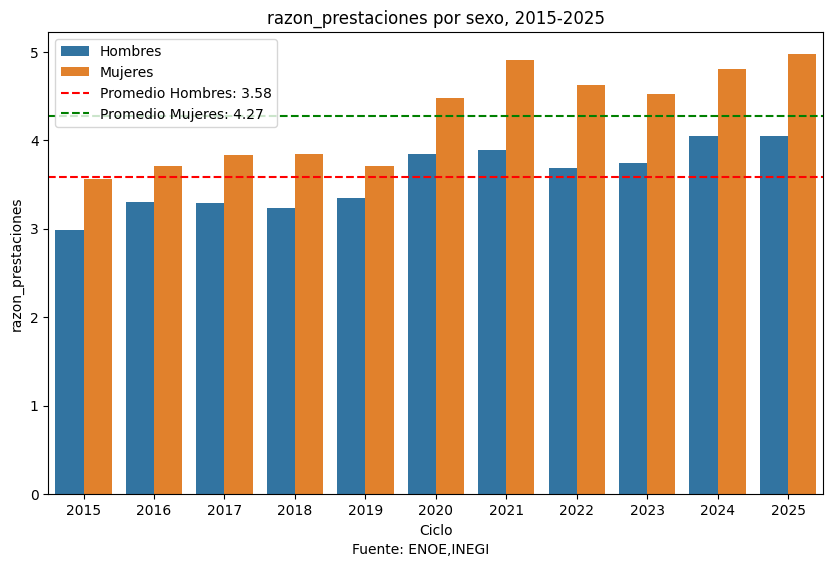

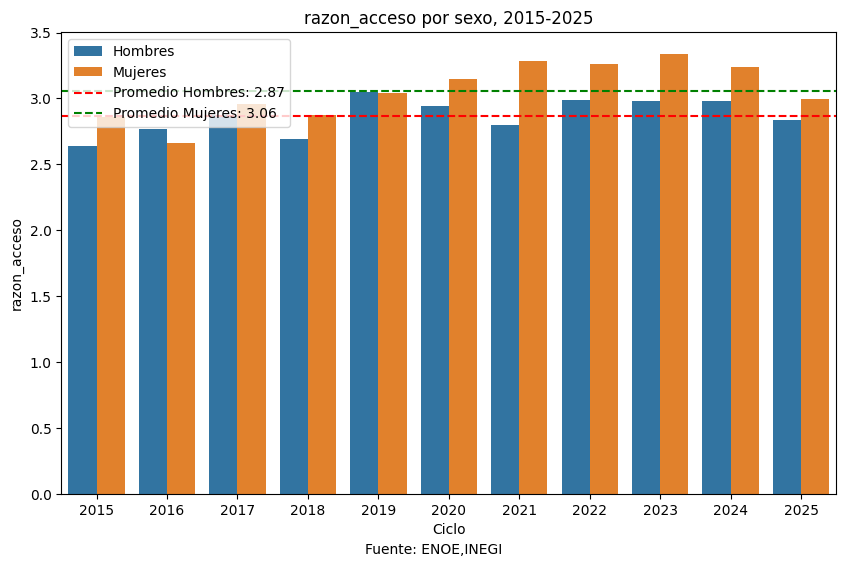

In [65]:
# Get the list of variables to plot
variables_to_plot = ['ratio_subocupado', "razon_contrato", 'razon_prestaciones', 'razon_acceso']

# Loop through each variable and generate a plot
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='ciclo', y=variable, hue='valor', data=cond_lab_bc)

    # mean bar by each group with different colors
    colors = ['red', 'green'] # Define a list of colors
    for i, group_value in enumerate(cond_lab_bc['valor'].unique()):
        group_data = cond_lab_bc[cond_lab_bc['valor'] == group_value]
        mean_value = group_data[variable].mean()
        plt.axhline(y=mean_value,
                    color=colors[i % len(colors)],
                    linestyle='--',
                    label=f'Promedio {group_value}: {mean_value:.2f}')

    # changue lables of plot
    ax = plt.gca() # Get the current Axes
    ax.legend(loc='upper left', ncols=1) # Use ax to set the legend location
    plt.xlabel('Ciclo')
    plt.ylabel(variable)
    plt.title(f'{variable} por sexo, 2015-2025')
    plt.figtext(0.5, 0.01, "Fuente: ENOE,INEGI ", ha="center", fontsize=10)

    plt.show() # Display each plot

In [ ]:
grouped_desc= cond_lab_bc[["valor",'Pob. subocupada total', "razon_contrato"]]
grouped_desc= round(grouped_desc.groupby('valor').describe(),2)

round(grouped_desc.drop('count', level=1, axis=1),2)

#1.3 banca y turismo

### banca

In [ ]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/2/Banca/TOTALES.xlsx'
sheet_name_to_import = 'captacion'

# Read the Excel file into a DataFrame
captacion = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

# Display the first few rows of the DataFrame
captacion.head()

,Periodo,Clave Municipio,Clave \nEstado,Región,Estado,Municipio,Población,Población Adulta,Población Adulta Mujeres,Población Adulta Hombres,...,Depósitos a plazo\nNúmero de cuentas_Banca,Transaccionales Nivel 1\nNúmero de cuentas_Banca,Transaccionales Nivel 2\nNúmero de cuentas_Banca,Transaccionales Nivel 3\nNúmero de cuentas_Banca,Transaccionales Nivel 4\nNúmero de cuentas_Banca,Tarjetas de débito\nNúmero_Banca,Ahorro\nNúmero de cuentas_EACP,Depósitos a plazo\nNúmero de cuentas_EACP,Depósitos a la vista\nNúmero de cuentas_EACP,Tarjetas de débito\nNúmero_EACP
0,2024,1001,1,Occidente y Bajío,Aguascalientes,Aguascalientes,948990.0,707473.0,368028.0,339445.0,...,21242,0,141663,705,1002200,1447212,65965,35075,208992,79466
1,2024,1002,1,Occidente y Bajío,Aguascalientes,Asientos,51536.0,35250.0,18088.0,17162.0,...,5,0,604,0,3189,11559,1936,328,2160,668
2,2024,1003,1,Occidente y Bajío,Aguascalientes,Calvillo,58250.0,41495.0,21446.0,20049.0,...,1877,0,2529,1,30285,48712,6930,1710,4391,1182
3,2024,1004,1,Occidente y Bajío,Aguascalientes,Cosío,17000.0,11817.0,6125.0,5692.0,...,2,0,808,0,2190,6150,1255,117,1199,289
4,2024,1005,1,Occidente y Bajío,Aguascalientes,Jesús María,129929.0,91487.0,46899.0,44588.0,...,278,0,338,0,17085,35042,10194,4494,21609,8373


In [ ]:
captacion.columns

Index(['Periodo', 'Clave Municipio', 'Clave \nEstado', 'Región', 'Estado',
       'Municipio', 'Población', 'Población Adulta',
       'Población Adulta Mujeres', 'Población Adulta Hombres',
       'Tipo de población', 'Índice de rezago social',
       'Ahorro\nNúmero de cuentas_Banca',
       'Depósitos a plazo\nNúmero de cuentas_Banca',
       'Transaccionales Nivel 1\nNúmero de cuentas_Banca',
       'Transaccionales Nivel 2\nNúmero de cuentas_Banca',
       'Transaccionales Nivel 3\nNúmero de cuentas_Banca',
       'Transaccionales Nivel 4\nNúmero de cuentas_Banca',
       'Tarjetas de débito\nNúmero_Banca', 'Ahorro\nNúmero de cuentas_EACP',
       'Depósitos a plazo\nNúmero de cuentas_EACP',
       'Depósitos a la vista\nNúmero de cuentas_EACP',
       'Tarjetas de débito\nNúmero_EACP'],
      dtype='object')

In [ ]:
# pivot table
pivot_table=pd.pivot_table(data=captacion,
                           index=["Periodo", "Estado"],
                           values=["Población Adulta",
                                   "Tarjetas de débito\nNúmero_Banca",
                                   "Tarjetas de débito\nNúmero_EACP"],
                           aggfunc=np.sum,
                           fill_value=0)

# pivot table to dataframe
captacion = pivot_table.reset_index()

captacion.head()

/tmp/ipython-input-1346833505.py:2: FutureWarning: The provided callable <function sum at 0x7a9f9898f880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table=pd.pivot_table(data=captacion,


,Periodo,Estado,Población Adulta,Tarjetas de débito\nNúmero_Banca,Tarjetas de débito\nNúmero_EACP
0,2015,Aguascalientes,9.070518e+05,1147214,2276
1,2015,Baja California,2.559106e+06,3601703,0
2,2015,Baja California Sur,5.533605e+05,781924,0
3,2015,Campeche,6.594798e+05,762231,4
4,2015,Chiapas,3.571940e+06,2554529,0


Text(0.5, 0.01, 'Fuente: CNBV, Inclusión financiera ')

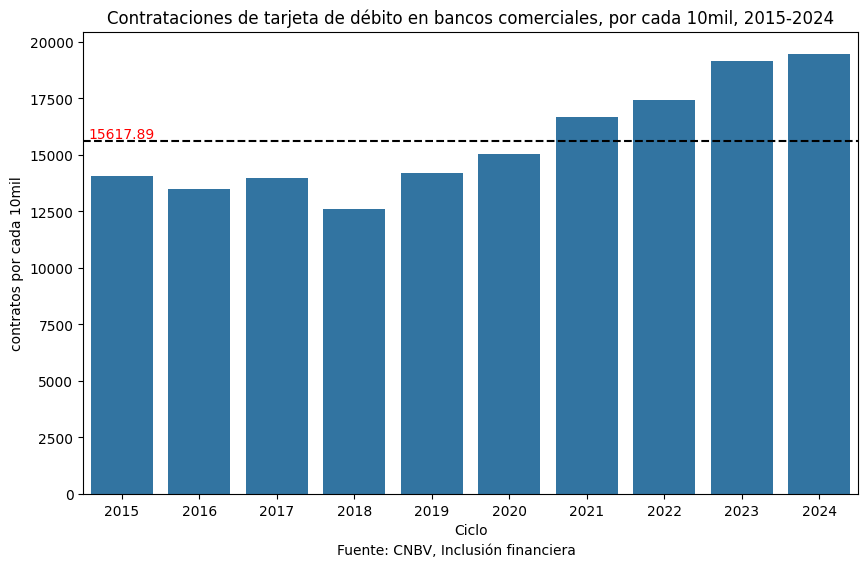

In [ ]:
# % de cobertura bancaria = (Número de personas con cuentas bancarias / Población total) x 100

captacion["cuentas_banco"]=captacion["Tarjetas de débito\nNúmero_Banca"]/captacion["Población Adulta"]*10000
captacion["cuentas_eacp"]=captacion["Tarjetas de débito\nNúmero_EACP"]/captacion["Población Adulta"]*10000

# filter baja california
captacion=captacion[captacion['Estado']=='Baja California']

# plot cuentas
plt.figure(figsize=(10, 6))
sns.barplot(x='Periodo',
            y="cuentas_banco",
            capsize=0.2,
            data=captacion)

# mean bar
mean_value = captacion["cuentas_banco"].mean()
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('contratos por cada 10mil')
plt.title('Contrataciones de tarjeta de débito en bancos comerciales, por cada 10mil, 2015-2024')
plt.figtext(0.5, 0.01, "Fuente: CNBV, Inclusión financiera ", ha="center", fontsize=10)

In [ ]:
grouped_desc= captacion[["Estado","cuentas_banco"]]
grouped_desc= round(grouped_desc.groupby('Estado').describe(),2)

round(grouped_desc.drop('count', level=1, axis=1),2)

cuentas_banco                                                  \
                         mean      std      min       25%       50%       75%   
Estado                                                                          
Baja California      15617.89  2422.97  12588.9  14013.29  14634.77  17251.28   

                          
                     max  
Estado                    
Baja California  19467.8

In [ ]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/2/Banca/TOTALES.xlsx'
sheet_name_to_import = 'infra_estruc'

# Read the Excel file into a DataFrame
infra = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

# Display the first few rows of the DataFrame
infra.head()

,Periodo,Clave Municipio,Clave \nEstado,Región,Estado,Municipio,Población total,Población adulta,Población adulta Mujeres,Población adulta Hombres,Tipo de población,Índice de rezago social,Corresponsales\nNúmero,Sucursales\nNúmero,Cajeros automáticos\nNúmero,TPV\nNúmero,Establecimientos con TPV\nNúmero,Cuentas que efectúan transacciones por celular\nNúmero,Transacciones en cajeros automáticos\nNúmero,Transacciones en TPV\nNúmero
0,2024,1001,1,Occidente y Bajío,Aguascalientes,Aguascalientes,948990.0,707473.0,368028.0,339445.0,Semi-metrópoli,Muy bajo,500,144,638,17570,11397,798621,1858676,3175484
1,2024,1002,1,Occidente y Bajío,Aguascalientes,Asientos,51536.0,35250.0,18088.0,17162.0,Urbano,Muy bajo,14,2,5,69,62,15607,17733,13740
2,2024,1003,1,Occidente y Bajío,Aguascalientes,Calvillo,58250.0,41495.0,21446.0,20049.0,Urbano,Muy bajo,18,8,20,269,237,23530,69469,29802
3,2024,1004,1,Occidente y Bajío,Aguascalientes,Cosío,17000.0,11817.0,6125.0,5692.0,Semi-urbano,Muy bajo,9,1,5,35,29,4711,17769,4646
4,2024,1005,1,Occidente y Bajío,Aguascalientes,Jesús María,129929.0,91487.0,46899.0,44588.0,Urbano,Muy bajo,59,7,41,953,810,51518,115568,161789


In [ ]:
# pivot table
pivot_table=pd.pivot_table(data=infra,
                           index=["Periodo", "Estado"],
                           values=["Población adulta",
                                   "Cuentas que efectúan transacciones por celular\nNúmero"],
                           aggfunc=np.sum,
                           fill_value=0)

# pivot table to dataframe
infra = pivot_table.reset_index()

/tmp/ipython-input-4210307157.py:2: FutureWarning: The provided callable <function sum at 0x7a9f9898f880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table=pd.pivot_table(data=infra,


Text(0.5, 0.01, 'Fuente: CNBV, Inclusión financiera ')

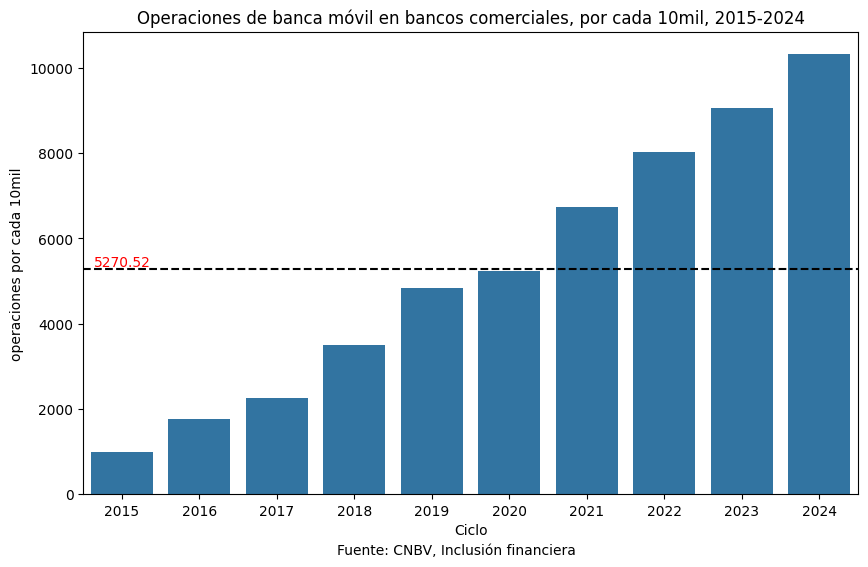

In [ ]:
# % de cobertura bancaria = (Número de personas con cuentas bancarias / Población total) x 10000

infra["banca_movil"]=infra["Cuentas que efectúan transacciones por celular\nNúmero"]/infra["Población adulta"]*10000

# filter baja california
infra=infra[infra['Estado']=='Baja California']

# plot cuentas
plt.figure(figsize=(10, 6))
sns.barplot(x='Periodo',
            y="banca_movil",
            capsize=0.2,
            data=infra)

# mean bar
mean_value = infra["banca_movil"].mean()
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('operaciones por cada 10mil')
plt.title('Operaciones de banca móvil en bancos comerciales, por cada 10mil, 2015-2024')
plt.figtext(0.5, 0.01, "Fuente: CNBV, Inclusión financiera ", ha="center", fontsize=10)

In [ ]:
grouped_desc= infra[["Estado","banca_movil"]]
grouped_desc= round(grouped_desc.groupby('Estado').describe(),2)

round(grouped_desc.drop('count', level=1, axis=1),2)

banca_movil                                             \
                       mean      std     min      25%     50%      75%   
Estado                                                                   
Baja California     5270.52  3212.23  981.64  2554.09  5038.6  7708.65   

                           
                      max  
Estado                     
Baja California  10323.68

In [ ]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/2/Banca/TOTALES.xlsx'
sheet_name_to_import = 'credito'

# Read the Excel file into a DataFrame
credito = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

In [ ]:
credito.columns

Index(['Periodo', 'Clave Municipio', 'Clave \nEstado', 'Región', 'Estado',
       'Municipio', 'Población total', 'Población adulta',
       'Población adulta Mujeres', 'Población adulta Hombres',
       'Tipo de población', 'Índice de rezago social',
       'Tarjetas de crédito\nNúmero_Banca',
       'Personal\nNúmero de créditos_Banca',
       'Nómina\nNúmero de créditos_Banca', 'ABCD\nNúmero de créditos_Banca',
       'Grupal\nNúmero de créditos_Banca',
       'Hipotecario\nNúmero de créditos_Banca',
       'Automotriz\nNúmero de créditos_Banca',
       'Tarjetas de crédito\nNúmero_EACP', 'Consumo\nNúmero de créditos_EACP',
       'Vivienda\nNúmero de créditos_EACP',
       'Comercial\nNúmero de créditos_EACP'],
      dtype='object')

In [ ]:
# pivot table
pivot_table=pd.pivot_table(data=credito,
                           index=["Periodo", "Estado"],
                           values=["Población adulta",
                                   "Tarjetas de crédito\nNúmero_Banca"],
                           aggfunc=np.sum,
                           fill_value=0)

# pivot table to dataframe
credito = pivot_table.reset_index()

/tmp/ipython-input-1997527645.py:2: FutureWarning: The provided callable <function sum at 0x7a9f9898f880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table=pd.pivot_table(data=credito,


Text(0.5, 0.01, 'Fuente: CNBV, Inclusión financiera ')

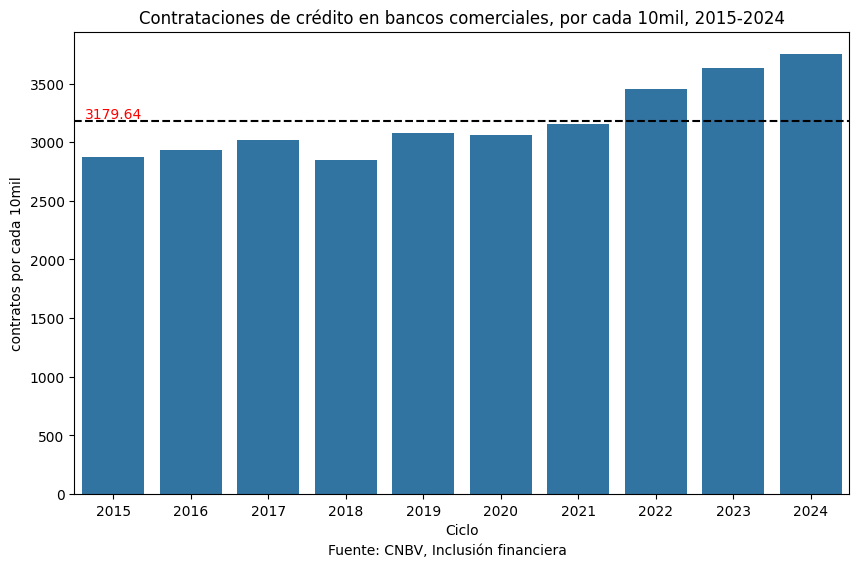

In [ ]:
# % de cobertura bancaria = (Número de personas con cuentas bancarias / Población total) x 100

credito["credito"]=credito["Tarjetas de crédito\nNúmero_Banca"]/credito["Población adulta"]*10000

# filter baja california
credito=credito[credito['Estado']=='Baja California']

# plot cuentas
plt.figure(figsize=(10, 6))
sns.barplot(x='Periodo',
            y="credito",
            capsize=0.2,
            data=credito)

# mean bar
mean_value = credito["credito"].mean()
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('contratos por cada 10mil')
plt.title('Contrataciones de crédito en bancos comerciales, por cada 10mil, 2015-2024')
plt.figtext(0.5, 0.01, "Fuente: CNBV, Inclusión financiera ", ha="center", fontsize=10)

In [ ]:
grouped_desc= credito[["Estado","credito"]]
grouped_desc= round(grouped_desc.groupby('Estado').describe(),2)

round(grouped_desc.drop('count', level=1, axis=1),2)

credito                                                    
                    mean     std      min     25%      50%      75%      max
Estado                                                                      
Baja California  3179.64  320.37  2849.49  2951.7  3069.03  3379.69  3751.73

### turismo

In [ ]:
# turismo
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/1.5/totales.xlsx'
sheet_name_to_import = 'estatal'

# Read the Excel file into a DataFrame
turismo = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

In [ ]:
turismo= turismo.transpose()

# headers name
turismo.columns=turismo.iloc[0]

# drop first row
turismo=turismo.drop(turismo.index[0])

# multiplicate by 100 each value
turismo=turismo.apply(lambda x: x*100)

turismo

Entidad federativa,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila de Zaragoza,Colima,Chiapas,Chihuahua,Ciudad de México,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
2015,5.728452,7.293732,17.79829,2.08961,3.653595,6.473614,9.90105,4.375922,11.822934,4.324498,...,28.001952,8.098529,6.894093,4.400752,5.251418,5.744098,7.779313,7.231147,13.34773,5.233219
2016,5.66649,7.602787,18.465326,2.237692,3.70776,6.600858,10.482223,4.491041,11.45717,4.397942,...,30.03152,7.127398,6.715149,4.152658,5.814005,5.970966,8.17442,7.491182,12.775499,5.437881
2017,5.612159,7.544779,18.867433,2.49161,3.521353,6.169034,11.239371,4.507485,10.895204,4.460857,...,32.188308,6.071176,6.593563,4.034628,6.491383,6.033846,8.036389,7.636642,11.905501,5.445828
2018,5.540873,7.638663,18.956844,2.671971,3.448105,6.118881,12.06958,4.648595,10.611783,4.520527,...,34.829988,5.403768,6.609198,3.940557,7.399879,5.943401,8.100885,7.709921,11.480143,5.488704
2019R,5.499578,7.909516,19.58388,2.708595,3.385452,5.739916,12.473387,4.689544,10.208499,4.492267,...,35.560457,5.074324,6.528618,3.800331,7.786619,5.781105,8.426344,7.405095,11.132504,5.730289
2020R,4.258951,6.206071,20.430125,2.078462,2.83126,4.323371,9.697767,3.392022,8.432126,3.311949,...,36.572883,3.730414,4.90709,2.806742,5.151852,4.351821,6.801235,5.648062,9.710403,4.38554
2021P,4.823563,6.914812,17.785694,2.69215,3.040118,5.464618,10.89216,4.197144,9.077255,3.922517,...,45.468374,4.405162,5.44824,3.323551,5.365033,4.993672,7.612304,5.815201,12.587272,5.816782
2022P,5.062078,8.041919,17.263906,2.750875,3.200624,6.227436,10.397868,5.527144,10.690945,3.031153,...,49.159606,5.068416,4.846036,4.104942,4.787469,4.954148,6.870235,6.998528,16.087082,4.322414


Text(0.5, 0.01, 'Fuente: DATAtur ')

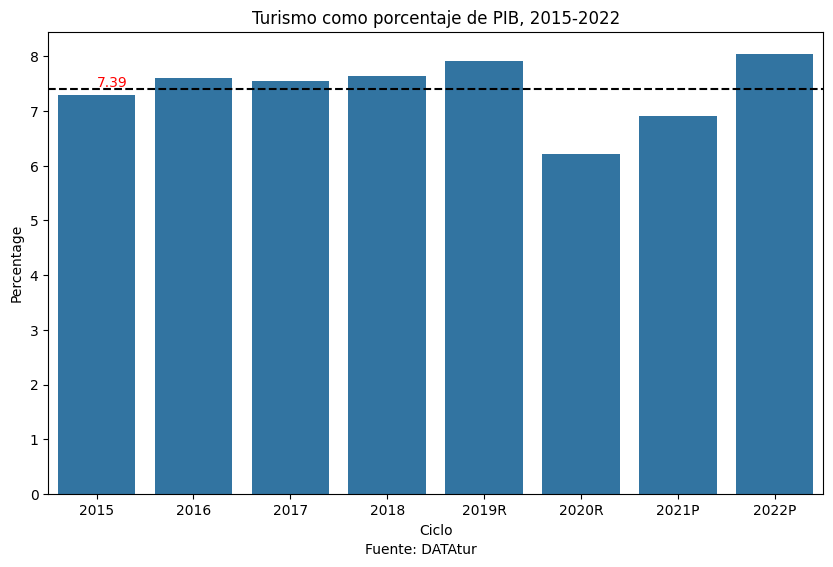

In [ ]:
# select Baja California column
turismo_bc = turismo['Baja California']

# plot turismo_bc
plt.figure(figsize=(10, 6))
sns.barplot(x=turismo_bc.index, y=turismo_bc.values)

# mean bar
mean_value = turismo_bc.mean() # Calculate mean directly on the Series
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(turismo_bc.index[0], mean_value, f'{mean_value:.2f}', ha='left', va='bottom', color='r') # Use index for x-coordinate

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('Percentage') # Assuming the values are percentages based on previous code
plt.title('Turismo como porcentaje de PIB, 2015-2022') # Updated title based on years
plt.figtext(0.5, 0.01, "Fuente: DATAtur ", ha="center", fontsize=10) # Assuming INEGI is the source

# 2.1 Heterogenidades por Municipio

### Sesiones cabildo

Iniciativas aprobadas en las sesiones de Cabildo o Concejo, por municipio o demarcación territorial según tema

In [ ]:
uno = pd.read_excel('/content/drive/MyDrive/ODS_8/2/CNGMD/ayuntamiento.xlsx', sheet_name="15")
#dos = pd.read_excel('/content/drive/MyDrive/ODS_8/2/CNGMD/ayuntamiento.xlsx', sheet_name="17")
#tres = pd.read_excel('/content/drive/MyDrive/ODS_8/2/CNGMD/ayuntamiento.xlsx', sheet_name="20")
#cuatro = pd.read_excel('/content/drive/MyDrive/ODS_8/2/CNGMD/ayuntamiento.xlsx', sheet_name="21")
cinco = pd.read_excel('/content/drive/MyDrive/ODS_8/2/CNGMD/ayuntamiento.xlsx', sheet_name="22")

ayuntamiento = pd.concat([cinco])

In [ ]:
#chague names
ayuntamiento.rename(columns={
    'Administración \ny gestoría \ninterna':'Admon_gestoria_interna',
    'Personas \nadultas \nmayores': "adulto_mayores",
    'Agricultura \ny desarrollo \nrural': "agri_desarr_rural",
    'Arte, \ncultura y otras \nmanifestaciones \nsociales': "arte",
    'Asuntos \nelectorales y \nparticipación \nciudadana': "part_ciudad",
    'Asuntos \nfinancieros \ny hacendarios': "finz_hacienda",
    'Asuntos \nindígenas': "asunt_indg",
    'Atención \na grupos \nsociales en \nsituación de \nvulnerabilidad1': "grupos_vuln",
    'Atención \na víctimas': "victimas",
    "Búsqueda \nde personas": "busq_personas",
    'Ciencia, \ntecnología \ne innovación': "ciencia_tecn",
    'Combate a \nla corrupción': "comb_corrup",
    'Combustibles \ny energía': "energia",
    'Cultura \nfísica y/o \ndeporte': "deporte",
    'Derechos \nhumanos': "derechos_humanos",
    'Desarrollo \nagrario, \nterritorial, \nurbano \ny vivienda': "desar_territ",
    'Desarrollo \nintegral de \nla familia': "familia",
    'Desarrollo \nsocial': "desar_social",
    'Gobierno \ny política \ninterior': "gobierno_int",
    'Igualdad \nde género y/o \nderechos de \nlas mujeres': "igualdad_genero",
    'Infraestructura, \ncomunicaciones \ny transportes': "comunicaciones",
    'Medio \nambiente \ny ecología': "medio_amb",
    'Migración \ny asuntos \nfronterizos': "migracion",
    'Movilidad \ny seguridad \nvial': "segur_vial",
    'Niñas, \nniños y \nadolescentes': "infancia",
    'Protección \ncivil': "protec_civil",
    'Protección \ny seguridad \nsocial': "protec_social",
    'Recursos \nhidráulicos': "agua",
    'Reinserción \nsocial': "reinsercion",
    'Seguridad \npública \no seguridad \nciudadana': "seg_pub",
    'Servicios \npúblicos': "serv_pub",
    "Transparencia, \nacceso a la \ninformación y \nprotección \nde datos \npersonales": "transparencia",
    'Seguridad \npública o \nseguridad \nciudadana': "seg_pub",
    'Servicios \nregistrales, \nadministrativos \ny patrimoniales': "patrimonios",
    'Secretaría del \nAyuntamiento': "gobierno_int",
    'Igualdad de \ngénero y/o \nderechos de \nlas mujeres': "igualdad_genero",
    'Despacho \ndel ejecutivo': "gobierno_int",
    'Desarrollo \nagrario, \nterritorial, \nurbano y \nvivienda': "desar_territ",
    'Asuntos \njurídicos': "asuntos_juridicos",
    'Asuntos \nfinancieros y \nhacendarios': "finz_hacienda",
    'Comunicaciones \ny transportes':"comunicaciones",
    "Servicios públicos": "serv_pub",
    'Obras públicas': "obras_pub",
    'Desarrollo urbano': "desar_territ",
    'Medio ambiente y ecología': "medio_amb",
    'Desarrollo social': "desar_social",
    'Desarrollo integral de la familia (DIF)': "familia",
    'Desarrollo económico': "desar_economico",
    'Infraestructura, comunicación y transportes': "comunicaciones"

}, inplace=True)

In [ ]:
ayuntamiento.columns

Index(['municipio', 'Admon_gestoria_interna', 'adulto_mayores',
       'agri_desarr_rural', 'arte', 'part_ciudad', 'finz_hacienda',
       'asunt_indg', 'grupos_vuln', 'victimas', 'busq_personas',
       'ciencia_tecn', 'comb_corrup', 'energia', 'deporte', 'derechos_humanos',
       'desar_territ', 'familia', 'desar_social', 'Economía', 'Educación',
       'gobierno_int', 'igualdad_genero', 'comunicaciones', 'Justicia ',
       'Juventud', 'medio_amb', 'migracion', 'segur_vial', 'infancia',
       'Población', 'protec_civil', 'protec_social', 'agua', 'Reglamentación',
       'reinsercion', 'Salud', 'seg_pub', 'serv_pub', 'Trabajo',
       'transparencia', 'Turismo', 'Otro'],
      dtype='object')

In [ ]:
# fill by zeros
ayuntamiento=ayuntamiento.fillna(0)

# drop columns without values
cols_to_drop = ayuntamiento.columns[(ayuntamiento == 0).all()].tolist()
ayuntamiento.drop(columns=cols_to_drop, inplace=True)

# filter data set municipios
municipios_baja_california = ["Ensenada", "Mexicali", "Tecate", "Tijuana", "San Quintín", "Playas de Rosarito", "San Felipe"]
ayuntamiento = ayuntamiento[ayuntamiento['municipio'].isin(municipios_baja_california)]

#sum by municipio
ayuntamiento = pd.DataFrame(ayuntamiento.groupby('municipio').sum())

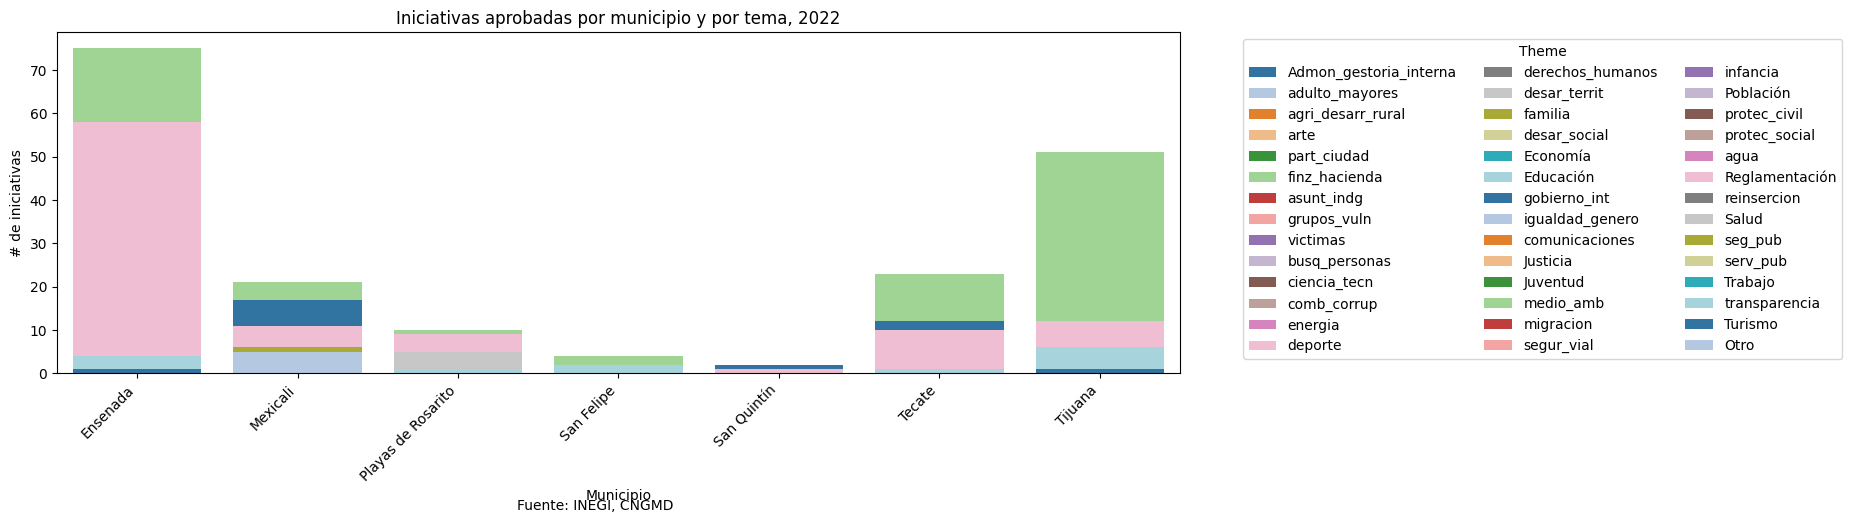

In [ ]:
# Reset the index to make 'municipio' a column
ayuntamiento_reset = ayuntamiento.reset_index()

# Melt the DataFrame to long format
ayuntamiento_melted = ayuntamiento_reset.melt(id_vars='municipio', var_name='Theme', value_name='Count')

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='municipio', y='Count', hue='Theme', data=ayuntamiento_melted, dodge=False, palette='tab20') # Changed palette to 'tab20'

# Add labels and title
plt.xlabel('Municipio')
plt.ylabel('# de iniciativas')
plt.title('Iniciativas aprobadas por municipio y por tema, 2022')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.figtext(0.5, 0.01, "Fuente: INEGI, CNGMD", ha="center", fontsize=10)

# Get the current Axes
ax = plt.gca()

# Move the legend outside the plot and use multiple columns
ax.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3) # Adjust ncol as needed

plt.show()

### IDH

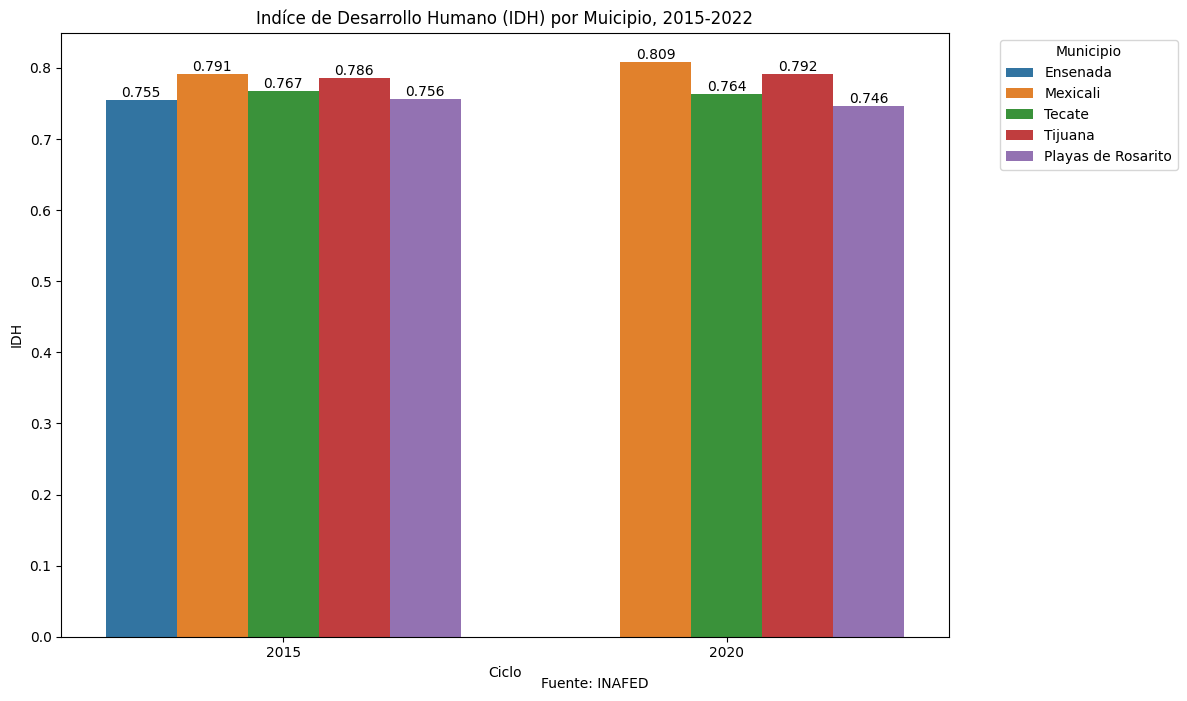

In [ ]:
# plot idh by municipio and ciclo in the same plot

idh = pd.read_excel("/content/drive/MyDrive/ODS_8/2/INAFED/idh_total.xlsx")

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='ciclo', y='idh', hue='municipio', data=idh) # Assign the Axes object to ax

# Add labels and title
plt.xlabel('Ciclo')
plt.ylabel('IDH')
plt.title('Indíce de Desarrollo Humano (IDH) por Muicipio, 2015-2022')
plt.figtext(0.5, 0.01, "Fuente: INAFED", ha="center", fontsize=10)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge') # Use bar_label for easier labeling

# Adjust legend position if needed
plt.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Adjust layout to prevent labels overlapping

plt.show()

### DENUE

In [ ]:
# DENUE
# UnicodeDecodeError often means the wrong encoding is used.
# Trying 'latin-1', if it doesn't work, try 'cp1252' or identify the correct encoding.
#quince = pd.read_csv("/content/drive/MyDrive/ODS_8/2/DENUE/15.csv", encoding='latin-1')
veintecinco= pd.read_csv("/content/drive/MyDrive/ODS_8/2/DENUE/25_1.csv", encoding='latin-1') # Also apply encoding here

# concat
denue = pd.concat([veintecinco])

# select colums
denue= denue[["municipio",'nombre_act']]

# transpose nombre_act
denue=denue.pivot_table(index='municipio', columns='nombre_act', aggfunc='size', fill_value=0)
denue

# drop columns with sum zeros
cols_to_drop = denue.columns[(denue == 0).all()].tolist()
denue.drop(columns=cols_to_drop, inplace=True)

# erase white spaces in all columns
denue.columns = denue.columns.str.strip()
#erase space in index
denue.index = denue.index.str.strip()

denue

nombre_act,Acabado de productos textiles,Actividades administrativas de instituciones de bienestar social,Actividades de seguridad nacional,Administración de aeropuertos y helipuertos,Administración de cajas de pensión y de seguros independientes,Administración de cementerios pertenecientes al sector privado,Administración de cementerios pertenecientes al sector público,Administración de puertos y muelles,Administración pública en general,Agencias de anuncios publicitarios,...,Transporte marítimo de petróleo y gas natural,Transporte por aguas interiores,Transporte por ductos de productos refinados del petróleo,Transporte por ferrocarril,Transporte turístico por agua,Transporte turístico por tierra,Tratamiento y disposición final de residuos no peligrosos por el sector privado,Tratamiento y disposición final de residuos peligrosos por el sector privado,"Venta de billetes de lotería, pronósticos deportivos y otros boletos de sorteo",Órganos legislativos
municipio,,,,,,,,,,,,,,,,,,,,,
Ensenada,3,85,10,0,4,3,6,2,79,1,...,0,1,0,0,9,4,0,1,7,1
Mexicali,1,182,3,1,8,3,4,0,126,8,...,1,0,1,0,0,2,0,2,23,4
Playas de Rosarito,1,24,3,0,0,0,0,0,31,0,...,0,0,0,0,0,2,0,0,1,0
San Felipe,0,6,4,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,1,1
San Quintín,0,28,5,0,0,0,4,0,22,0,...,0,1,0,0,2,2,0,0,0,0
Tecate,1,46,1,0,1,0,3,0,58,0,...,0,0,0,0,0,0,1,0,2,1
Tijuana,5,174,6,5,10,5,10,0,170,6,...,0,0,0,3,0,8,3,2,19,0


In [ ]:
# summ each activities by percentage
prop = pd.DataFrame(denue.sum()).reset_index() # Sum columns and reset index
prop.columns = ['nombre_act', 'count'] # Rename columns

# order ascending
prop = prop.sort_values(by='count', ascending=False)

# Percentage acumulated
prop['cumperc'] = prop['count'].cumsum ()/ prop['count'].sum() * 100 # Calculate percentage

# select below 80
prop = prop[prop['cumperc'] <= 80]

# top 10
top10= prop.head(10)
top10

,nombre_act,count,cumperc
249,"Comercio al por menor en tiendas de abarrotes,...",12150,8.765981
743,Salones y clínicas de belleza y peluquerías,9103,15.333612
238,"Comercio al por menor de ropa, excepto de bebé...",4081,18.277972
52,Asociaciones y organizaciones religiosas,3998,21.162448
183,Comercio al por menor de artículos usados,3271,23.522409
295,Consultorios dentales del sector privado,3250,25.867219
719,Reparación mecánica en general de automóviles ...,3249,28.211307
75,"Cafeterías, fuentes de sodas, neverías, refres...",3097,30.445730
735,Restaurantes con servicio de preparación de al...,2708,32.399498
64,Banca múltiple,2660,34.318634


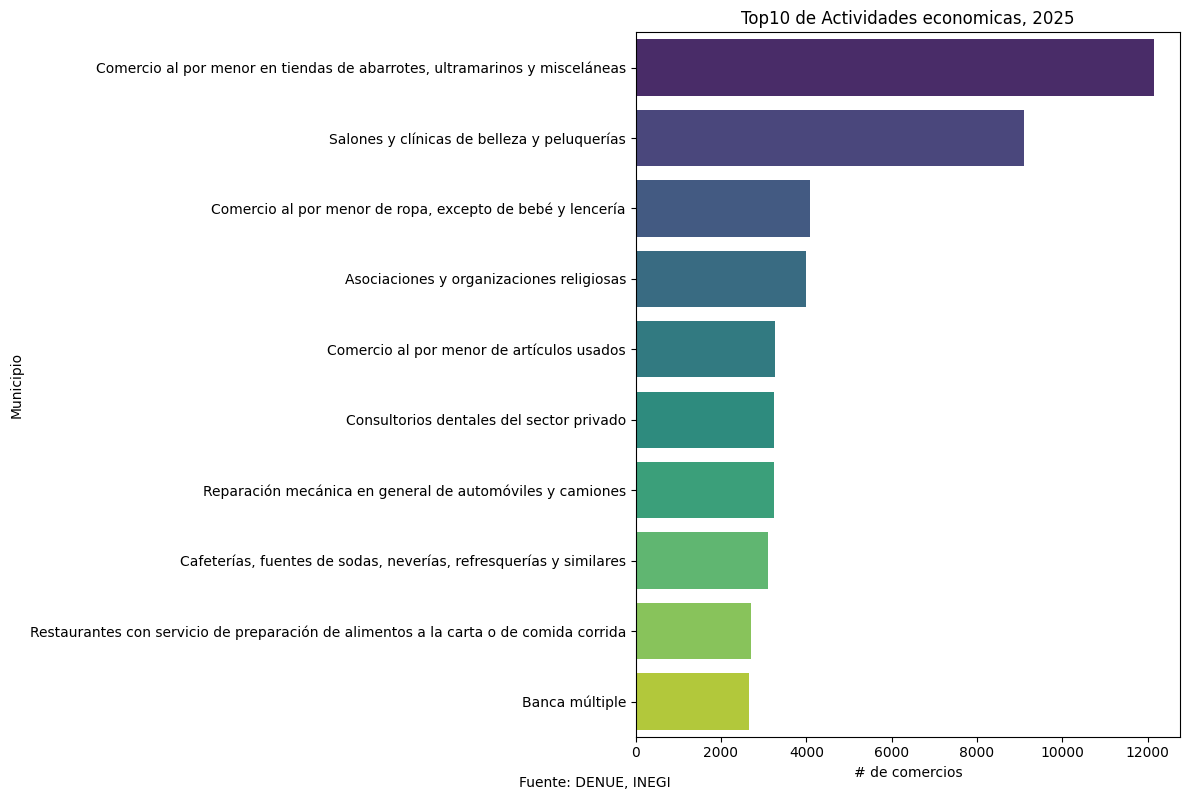

In [ ]:
# Sort the activities by count in descending order
prop_sorted = prop.sort_values(by='count', ascending=False)

# Select the top 10 activities (or adjust as needed)
top_n = 10
prop_top_n = prop_sorted.head(top_n)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
# Assign the y-variable to hue and set legend=False to avoid the FutureWarning
sns.barplot(x='count', y='nombre_act', data=prop_top_n, palette='viridis', hue='nombre_act', legend=False)

# Add labels and title
plt.xlabel('# de comercios') # Swapped labels
plt.ylabel('Municipio') # Swapped labels
plt.title('Top10 de Actividades economicas, 2025') # Updated title
plt.figtext(0.5, 0.01, "Fuente: DENUE, INEGI", ha="center", fontsize=10)
plt.tight_layout() # Adjust layout

plt.show()

In [ ]:
bottom10= prop.tail(10)
bottom10

,nombre_act,count,cumperc
37,Alquiler sin intermediación de oficinas y loca...,296,78.055467
747,Servicios de acceso a computadoras,288,78.263254
186,Comercio al por menor de automóviles y camione...,286,78.469597
143,Comercio al por mayor de madera para la constr...,284,78.674497
207,Comercio al por menor de juguetes,281,78.877233
229,Comercio al por menor de pescados y mariscos,278,79.077804
358,Escuelas de deporte del sector privado,277,79.277654
262,Confección de prendas de vestir sobre medida,277,79.477504
83,Casas de empeño,274,79.675190
379,Escuelas del sector privado que combinan diver...,272,79.871432


In [ ]:
# denue selecting just the top 10
top10 = denue[top10['nombre_act']]

# total colum by row
#top10["total"]= denue.sum(axis=1)
top10

nombre_act,"Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas",Salones y clínicas de belleza y peluquerías,"Comercio al por menor de ropa, excepto de bebé y lencería",Asociaciones y organizaciones religiosas,Comercio al por menor de artículos usados,Consultorios dentales del sector privado,Reparación mecánica en general de automóviles y camiones,"Cafeterías, fuentes de sodas, neverías, refresquerías y similares",Restaurantes con servicio de preparación de alimentos a la carta o de comida corrida,Banca múltiple
municipio,,,,,,,,,,
Ensenada,1477,1221,605,570,751,250,427,460,420,311
Mexicali,2238,2538,922,835,855,1050,1107,719,613,772
Playas de Rosarito,496,385,178,201,143,94,111,173,154,90
San Felipe,43,54,40,32,28,9,40,17,33,13
San Quintín,620,212,152,203,134,30,109,104,45,26
Tecate,364,258,171,182,142,88,119,92,106,69
Tijuana,6912,4435,2013,1975,1218,1729,1336,1532,1337,1379


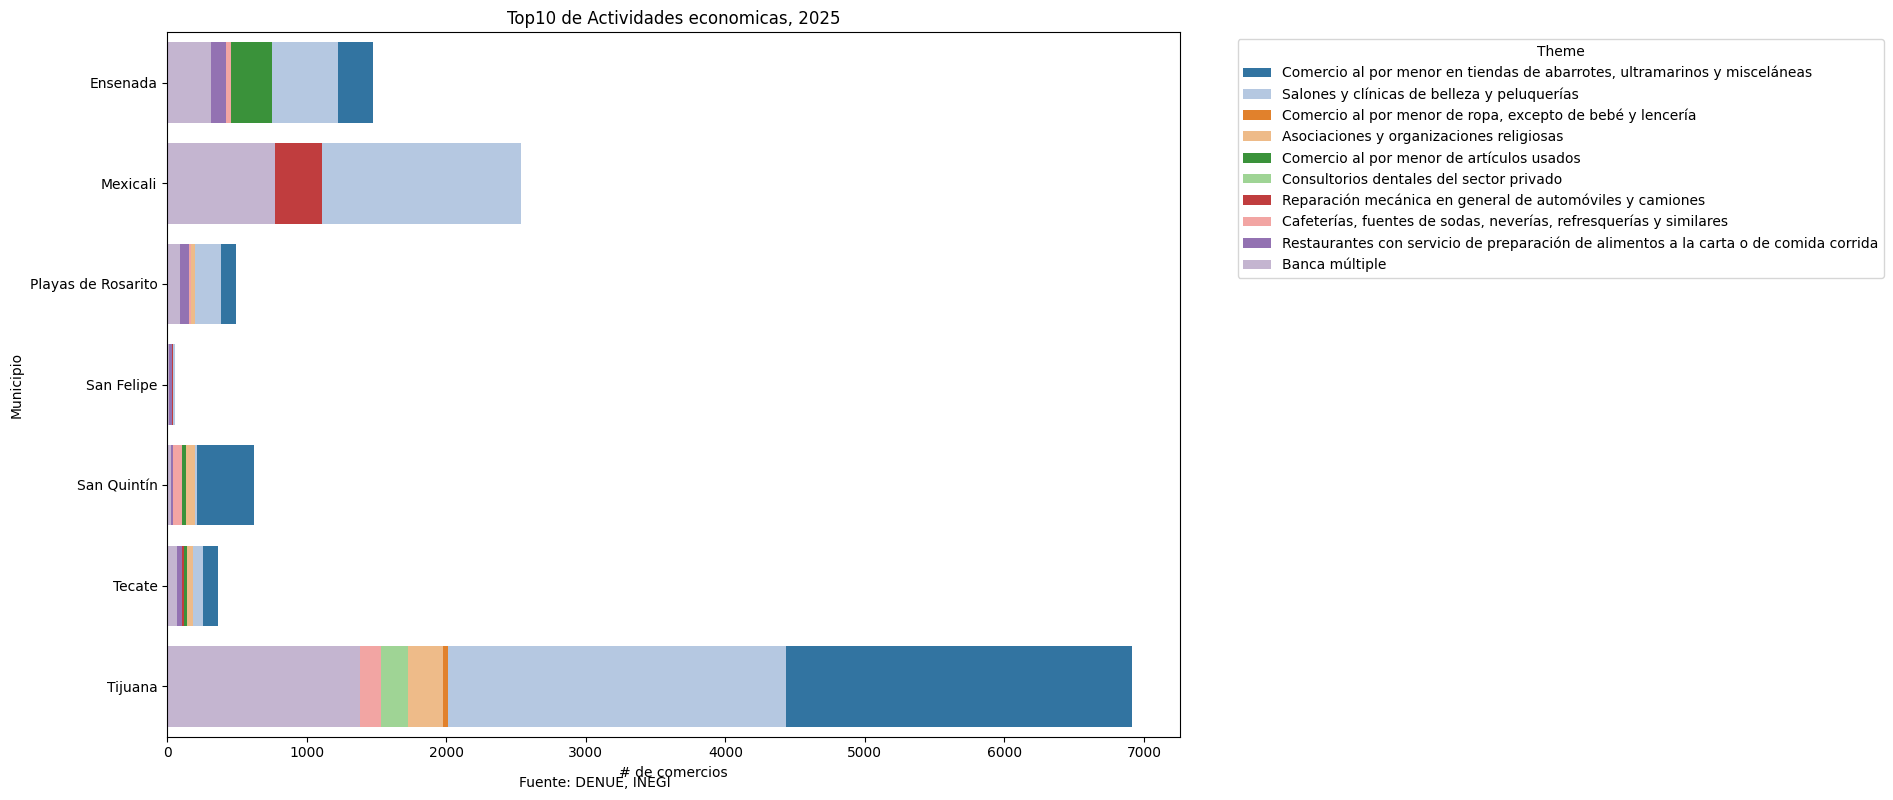

In [ ]:
# Reset the index to make 'municipio' a column
top10_reset = top10.reset_index()

# Melt the DataFrame to long format
top_melted = top10_reset.melt(id_vars='municipio', var_name='Theme', value_name='Count')

# Plot stacked bar chart horizontal
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='municipio', hue='Theme', data=top_melted, dodge=False, palette='tab20') # Swapped x and y

# Add labels and title
plt.xlabel('# de comercios') # Swapped labels
plt.ylabel('Municipio') # Swapped labels
plt.title('Top10 de Actividades economicas, 2025') # Updated title
plt.figtext(0.5, 0.01, "Fuente: DENUE, INEGI", ha="center", fontsize=10)
plt.tight_layout() # Adjust layout

# Get the current Axes
ax = plt.gca()

# Adjust legend position (might need further tuning for horizontal)
ax.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1) # Adjusted legend position and columns for horizontal

plt.show()

In [ ]:
# transpose nombre_act
personal= veintecinco.copy()
personal=personal.pivot_table(index='municipio', columns='per_ocu', aggfunc='size', fill_value=0)
personal

# drop columns with sum zeros
cols_to_drop = personal.columns[(personal == 0).all()].tolist()
personal.drop(columns=cols_to_drop, inplace=True)

# erase white spaces in all columns
personal.columns = personal.columns.str.strip()
#erase space in index
personal.index = personal.index.str.strip()

personal

per_ocu,0 a 5 personas,101 a 250 personas,11 a 30 personas,251 y más personas,31 a 50 personas,51 a 100 personas,6 a 10 personas
municipio,,,,,,,
Ensenada,15591,96,1221,53,233,171,1834
Mexicali,30216,230,2713,179,562,385,3938
Playas de Rosarito,5054,23,333,12,53,40,573
San Felipe,935,4,92,1,17,10,144
San Quintín,3644,6,214,4,37,16,327
Tecate,3643,43,323,29,87,69,462
Tijuana,50971,484,4581,349,1004,674,6924


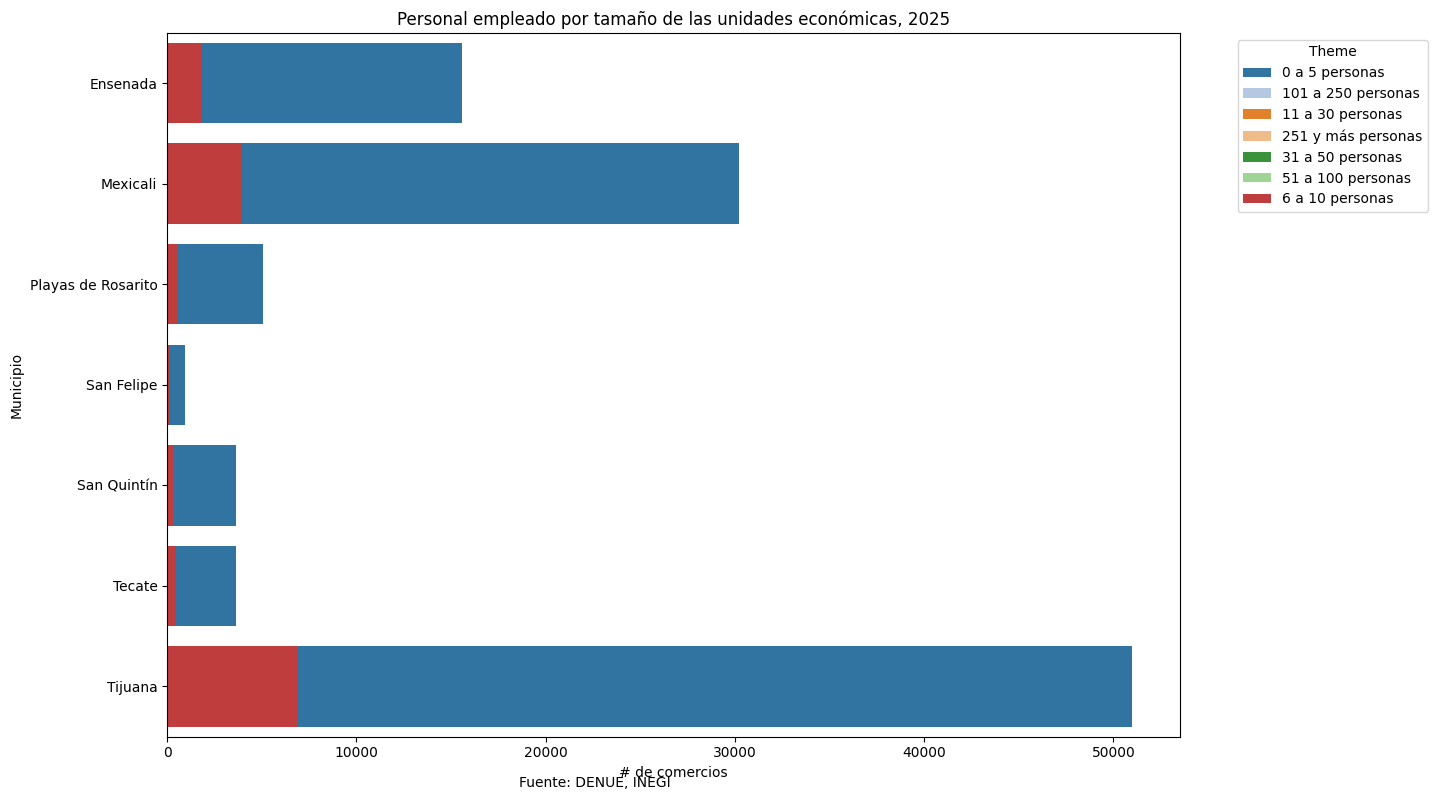

In [ ]:
# Reset the index to make 'municipio' a column
personal_reset = personal.reset_index()

# Melt the DataFrame to long format
personal_melted = personal_reset.melt(id_vars='municipio', var_name='Theme', value_name='Count')

# Plot stacked bar chart horizontal
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='municipio', hue='Theme', data=personal_melted, dodge=False, palette='tab20') # Swapped x and y

# Add labels and title
plt.xlabel('# de comercios') # Swapped labels
plt.ylabel('Municipio') # Swapped labels
plt.title('Personal empleado por tamaño de las unidades económicas, 2025') # Updated title
plt.figtext(0.5, 0.01, "Fuente: DENUE, INEGI", ha="center", fontsize=10)
plt.tight_layout() # Adjust layout

# Get the current Axes
ax = plt.gca()

# Adjust legend position (might need further tuning for horizontal)
ax.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1) # Adjusted legend position and columns for horizontal

plt.show()

### turismo

In [ ]:
# turismo
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/1.5/totales.xlsx'
sheet_name_to_import = 'municipio'

# Read the Excel file into a DataFrame
turismo = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

In [ ]:
# filtar baja california
turismo=turismo[turismo['Entidad federativa']=='Baja California']

# drop entidad
turismo.drop(columns=['Entidad federativa'], inplace=True)

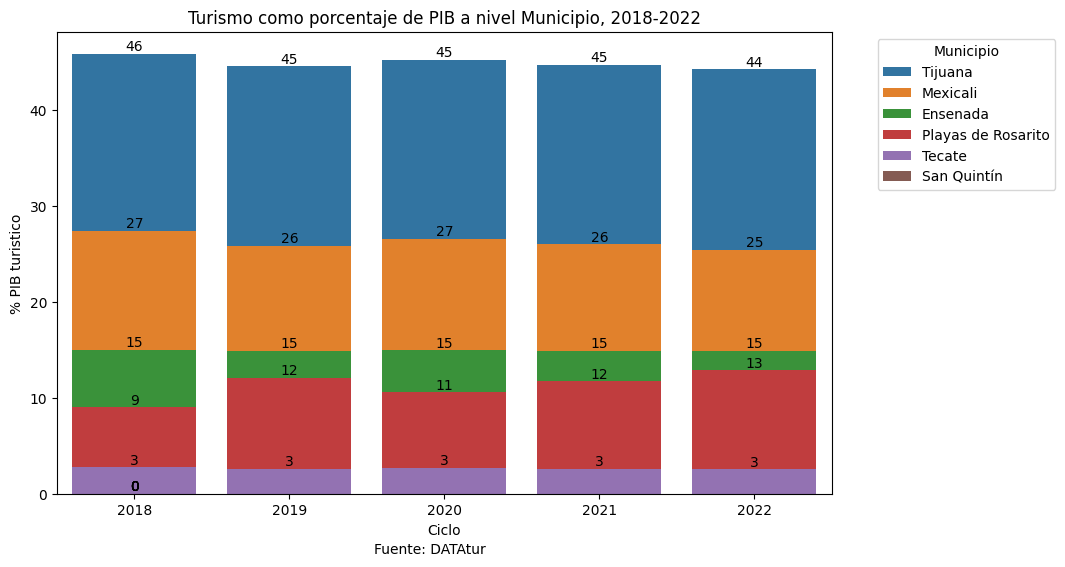

In [ ]:
# Melt the DataFrame to long format for stacking
turismo_melted = turismo.melt(id_vars='Municipio', var_name='Year', value_name='Percentage')

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Percentage', hue='Municipio', data=turismo_melted, dodge=False)

# vaules in each stacked bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.0f}'.format(p.get_height()), ha='center', va='bottom')

# Add labels and title
# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('% PIB turistico') # Assuming the values are percentages based on previous code
plt.title('Turismo como porcentaje de PIB a nivel Municipio, 2018-2022') # Updated title based on years
plt.figtext(0.5, 0.01, "Fuente: DATAtur ", ha="center", fontsize=10)

# Add legend outside
plt.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### banca

In [ ]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/2/Banca/TOTALES.xlsx'
sheet_name_to_import = 'captacion'

# Read the Excel file into a DataFrame
captacion = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

# Display the first few rows of the DataFrame
captacion.head()

,Periodo,Clave Municipio,Clave \nEstado,Región,Estado,Municipio,Población,Población Adulta,Población Adulta Mujeres,Población Adulta Hombres,...,Depósitos a plazo\nNúmero de cuentas_Banca,Transaccionales Nivel 1\nNúmero de cuentas_Banca,Transaccionales Nivel 2\nNúmero de cuentas_Banca,Transaccionales Nivel 3\nNúmero de cuentas_Banca,Transaccionales Nivel 4\nNúmero de cuentas_Banca,Tarjetas de débito\nNúmero_Banca,Ahorro\nNúmero de cuentas_EACP,Depósitos a plazo\nNúmero de cuentas_EACP,Depósitos a la vista\nNúmero de cuentas_EACP,Tarjetas de débito\nNúmero_EACP
0,2024,1001,1,Occidente y Bajío,Aguascalientes,Aguascalientes,948990.0,707473.0,368028.0,339445.0,...,21242,0,141663,705,1002200,1447212,65965,35075,208992,79466
1,2024,1002,1,Occidente y Bajío,Aguascalientes,Asientos,51536.0,35250.0,18088.0,17162.0,...,5,0,604,0,3189,11559,1936,328,2160,668
2,2024,1003,1,Occidente y Bajío,Aguascalientes,Calvillo,58250.0,41495.0,21446.0,20049.0,...,1877,0,2529,1,30285,48712,6930,1710,4391,1182
3,2024,1004,1,Occidente y Bajío,Aguascalientes,Cosío,17000.0,11817.0,6125.0,5692.0,...,2,0,808,0,2190,6150,1255,117,1199,289
4,2024,1005,1,Occidente y Bajío,Aguascalientes,Jesús María,129929.0,91487.0,46899.0,44588.0,...,278,0,338,0,17085,35042,10194,4494,21609,8373


In [ ]:
captacion.columns

Index(['Periodo', 'Clave Municipio', 'Clave \nEstado', 'Región', 'Estado',
       'Municipio', 'Población', 'Población Adulta',
       'Población Adulta Mujeres', 'Población Adulta Hombres',
       'Tipo de población', 'Índice de rezago social',
       'Ahorro\nNúmero de cuentas_Banca',
       'Depósitos a plazo\nNúmero de cuentas_Banca',
       'Transaccionales Nivel 1\nNúmero de cuentas_Banca',
       'Transaccionales Nivel 2\nNúmero de cuentas_Banca',
       'Transaccionales Nivel 3\nNúmero de cuentas_Banca',
       'Transaccionales Nivel 4\nNúmero de cuentas_Banca',
       'Tarjetas de débito\nNúmero_Banca', 'Ahorro\nNúmero de cuentas_EACP',
       'Depósitos a plazo\nNúmero de cuentas_EACP',
       'Depósitos a la vista\nNúmero de cuentas_EACP',
       'Tarjetas de débito\nNúmero_EACP'],
      dtype='object')

In [ ]:
# pivot table
pivot_table=pd.pivot_table(data=captacion,
                           index=["Periodo", "Municipio"],
                           values=["Población Adulta",
                                   "Tarjetas de débito\nNúmero_Banca",
                                   "Tarjetas de débito\nNúmero_EACP"],
                           aggfunc=np.sum,
                           fill_value=0)

# pivot table to dataframe
captacion = pivot_table.reset_index()

captacion.head()

/tmp/ipython-input-4002624776.py:2: FutureWarning: The provided callable <function sum at 0x7ee011b0b7e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table=pd.pivot_table(data=captacion,


,Periodo,Municipio,Población Adulta,Tarjetas de débito\nNúmero_Banca,Tarjetas de débito\nNúmero_EACP
0,2015,Abalá,4889.245788,305,0
1,2015,Abasolo,74332.793907,32072,1362
2,2015,Abejones,709.846074,25,0
3,2015,Acacoyagua,12537.726135,474,0
4,2015,Acajete,49829.120516,7693,10


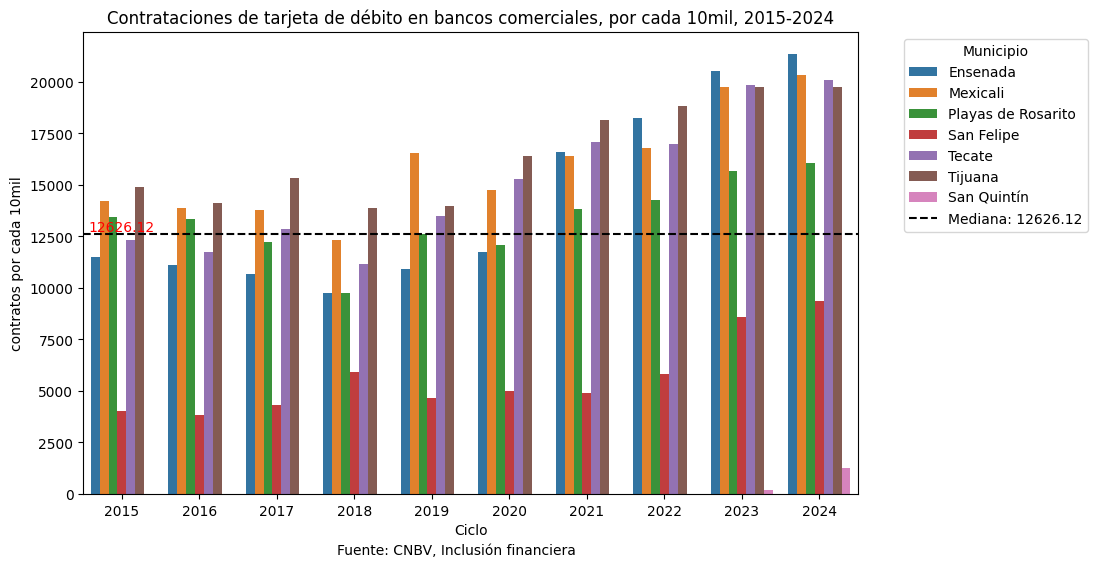

In [ ]:
# % de cobertura bancaria = (Número de personas con cuentas bancarias / Población total) x 100

captacion["cuentas_banco"]=captacion["Tarjetas de débito\nNúmero_Banca"]/captacion["Población Adulta"]*10000
captacion["cuentas_eacp"]=captacion["Tarjetas de débito\nNúmero_EACP"]/captacion["Población Adulta"]*10000

# filter baja california
municipios_baja_california = ["Ensenada", "Mexicali", "Tecate", "Tijuana", "San Quintín", "Playas de Rosarito", "San Felipe"]
captacion=captacion[captacion['Municipio'].isin(municipios_baja_california)]


# plot cuentas
plt.figure(figsize=(10, 6))
sns.barplot(x='Periodo',
            y="cuentas_banco",
            hue="Municipio",
            capsize=0.2,
            data=captacion)



# mean bar
mean_value = captacion["cuentas_banco"].mean()
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('contratos por cada 10mil')
plt.title('Contrataciones de tarjeta de débito en bancos comerciales, por cada 10mil, 2015-2024')
plt.figtext(0.5, 0.01, "Fuente: CNBV, Inclusión financiera ", ha="center", fontsize=10)
plt.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
grouped_desc= captacion[["cuentas_banco", "Municipio"]]
grouped_desc= round(grouped_desc.groupby('Municipio').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

cuentas_banco                                         \
                            mean      std       min       25%       50%   
Municipio                                                                 
Ensenada                14239.62  4459.59   9752.28  10976.11  11617.97   
Mexicali                15875.81  2609.67  12340.26  13962.42  15576.77   
Playas de Rosarito      13326.44  1832.32   9765.29  12307.24  13389.13   
San Felipe               5638.94  1882.75   3840.75   4388.94   4962.82   
San Quintín               361.48   596.40      0.00      0.09    100.61   
Tecate                  15079.90  3282.86  11138.99  12457.39  14385.54   
Tijuana                 16501.86  2412.79  13866.21  14307.59  15847.70   

                                        
                         75%       max  
Municipio                               
Ensenada            17840.49  21346.84  
Mexicali            16706.72  20328.07  
Playas de Rosarito  14168.56  16081.65  
San Felipe           5896.05   9341.49  
San Quintín           462.00   1244.71  
Tecate              17037.16  20072.20  
Tijuana             18653.07  19757.79

In [ ]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/2/Banca/TOTALES.xlsx'
sheet_name_to_import = 'infra_estruc'

# Read the Excel file into a DataFrame
infra = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

# Display the first few rows of the DataFrame
infra.head()

,Periodo,Clave Municipio,Clave \nEstado,Región,Estado,Municipio,Población total,Población adulta,Población adulta Mujeres,Población adulta Hombres,Tipo de población,Índice de rezago social,Corresponsales\nNúmero,Sucursales\nNúmero,Cajeros automáticos\nNúmero,TPV\nNúmero,Establecimientos con TPV\nNúmero,Cuentas que efectúan transacciones por celular\nNúmero,Transacciones en cajeros automáticos\nNúmero,Transacciones en TPV\nNúmero
0,2024,1001,1,Occidente y Bajío,Aguascalientes,Aguascalientes,948990.0,707473.0,368028.0,339445.0,Semi-metrópoli,Muy bajo,500,144,638,17570,11397,798621,1858676,3175484
1,2024,1002,1,Occidente y Bajío,Aguascalientes,Asientos,51536.0,35250.0,18088.0,17162.0,Urbano,Muy bajo,14,2,5,69,62,15607,17733,13740
2,2024,1003,1,Occidente y Bajío,Aguascalientes,Calvillo,58250.0,41495.0,21446.0,20049.0,Urbano,Muy bajo,18,8,20,269,237,23530,69469,29802
3,2024,1004,1,Occidente y Bajío,Aguascalientes,Cosío,17000.0,11817.0,6125.0,5692.0,Semi-urbano,Muy bajo,9,1,5,35,29,4711,17769,4646
4,2024,1005,1,Occidente y Bajío,Aguascalientes,Jesús María,129929.0,91487.0,46899.0,44588.0,Urbano,Muy bajo,59,7,41,953,810,51518,115568,161789


In [ ]:
# pivot table
pivot_table=pd.pivot_table(data=infra,
                           index=["Periodo", "Municipio"],
                           values=["Población adulta",
                                   "Cuentas que efectúan transacciones por celular\nNúmero"],
                           aggfunc=np.sum,
                           fill_value=0)

# pivot table to dataframe
infra = pivot_table.reset_index()

/tmp/ipython-input-4092006866.py:2: FutureWarning: The provided callable <function sum at 0x7ee011b0b7e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table=pd.pivot_table(data=infra,


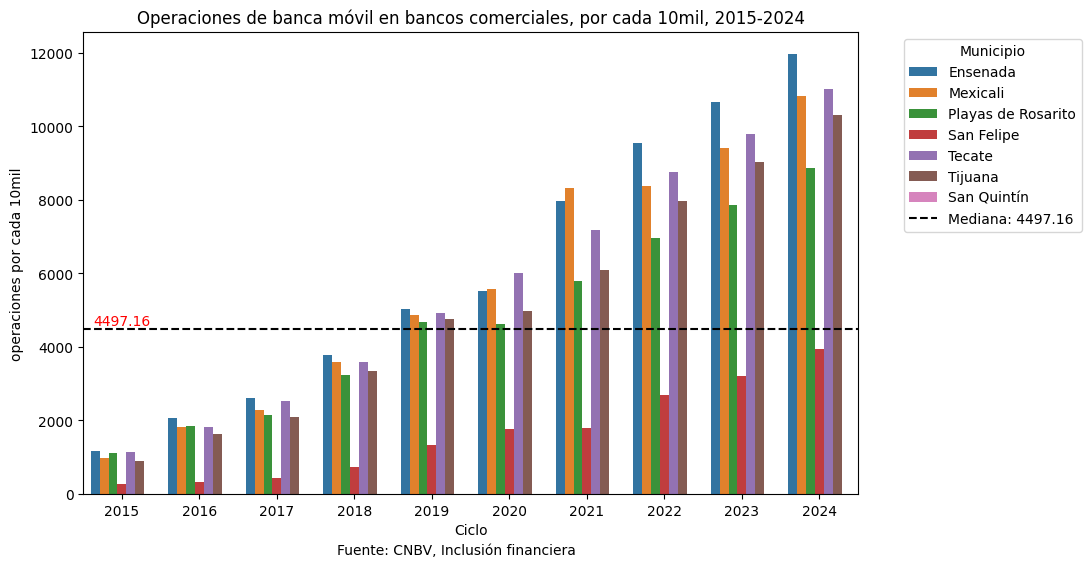

In [ ]:
# % de cobertura bancaria = (Número de personas con cuentas bancarias / Población total) x 100

infra["banca_movil"]=infra["Cuentas que efectúan transacciones por celular\nNúmero"]/infra["Población adulta"]*10000

# filter baja california
municipios_baja_california = ["Ensenada", "Mexicali", "Tecate", "Tijuana", "San Quintín", "Playas de Rosarito", "San Felipe"]
infra=infra[infra['Municipio'].isin(municipios_baja_california)]


# plot cuentas
plt.figure(figsize=(10, 6))
sns.barplot(x='Periodo',
            y="banca_movil",
            hue="Municipio",
            capsize=0.2,
            data=infra)

# mean bar
mean_value = infra["banca_movil"].mean()
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('operaciones por cada 10mil')
plt.title('Operaciones de banca móvil en bancos comerciales, por cada 10mil, 2015-2024')
plt.figtext(0.5, 0.01, "Fuente: CNBV, Inclusión financiera ", ha="center", fontsize=10)
plt.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
grouped_desc= infra[["banca_movil", "Municipio"]]
grouped_desc= round(grouped_desc.groupby('Municipio').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

banca_movil                                               \
                          mean      std      min      25%      50%      75%   
Municipio                                                                     
Ensenada               6033.73  3799.38  1177.60  2908.16  5276.31  9156.35   
Mexicali               5600.97  3466.51   969.78  2610.92  5217.55  8362.86   
Playas de Rosarito     4712.27  2646.41  1122.26  2429.49  4641.57  6675.32   
San Felipe             1651.55  1290.15   259.71   508.02  1544.70  2480.63   
San Quintín               1.35     1.98     0.12     0.31     0.49     1.54   
Tecate                 5672.94  3459.03  1133.28  2791.47  5465.16  8357.32   
Tijuana                5109.85  3222.52   910.92  2404.93  4870.43  7491.71   

                              
                         max  
Municipio                     
Ensenada            11965.00  
Mexicali            10822.41  
Playas de Rosarito   8854.24  
San Felipe           3955.59  
San Quintín             4.30  
Tecate              11026.35  
Tijuana             10296.45

In [ ]:
# Specify the path to your Excel file and name of sheet
file_path = '/content/drive/MyDrive/ODS_8/2/Banca/TOTALES.xlsx'
sheet_name_to_import = 'credito'

# Read the Excel file into a DataFrame
credito = pd.read_excel(file_path, sheet_name = sheet_name_to_import)

In [ ]:
# pivot table
pivot_table=pd.pivot_table(data=credito,
                           index=["Periodo", "Municipio"],
                           values=["Población adulta",
                                   "Tarjetas de crédito\nNúmero_Banca"],
                           aggfunc=np.sum,
                           fill_value=0)

# pivot table to dataframe
credito = pivot_table.reset_index()

/tmp/ipython-input-4109108346.py:2: FutureWarning: The provided callable <function sum at 0x7ee011b0b7e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table=pd.pivot_table(data=credito,


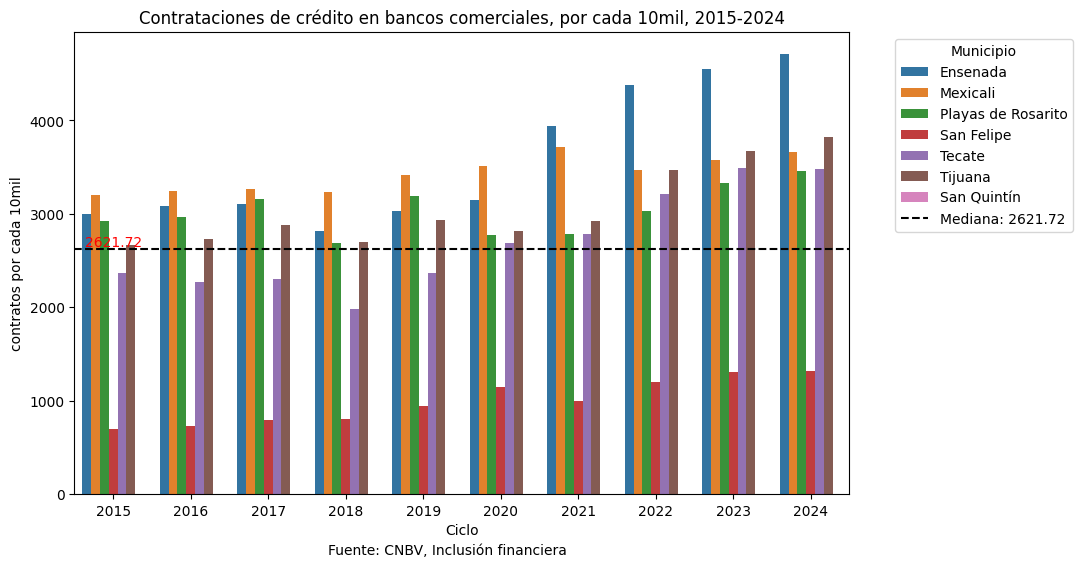

In [ ]:
# % de cobertura bancaria = (Número de personas con cuentas bancarias / Población total) x 100

credito["credito"]=credito["Tarjetas de crédito\nNúmero_Banca"]/credito["Población adulta"]*10000

# filter baja california
municipios_baja_california = ["Ensenada", "Mexicali", "Tecate", "Tijuana", "San Quintín", "Playas de Rosarito", "San Felipe"]
credito=credito[credito['Municipio'].isin(municipios_baja_california)]


# plot cuentas
plt.figure(figsize=(10, 6))
sns.barplot(x='Periodo',
            y="credito",
            hue="Municipio",
            capsize=0.2,
            data=credito)

# mean bar
mean_value = credito["credito"].mean()
plt.axhline(y=mean_value, color='black', linestyle='--', label=f'Mediana: {mean_value:.2f}')

# value of the meadin bar
plt.text(0, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='r')

# changue lables of plot
plt.xlabel('Ciclo')
plt.ylabel('contratos por cada 10mil')
plt.title('Contrataciones de crédito en bancos comerciales, por cada 10mil, 2015-2024')
plt.figtext(0.5, 0.01, "Fuente: CNBV, Inclusión financiera ", ha="center", fontsize=10)
plt.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
grouped_desc= credito[["credito", "Municipio"]]
grouped_desc= round(grouped_desc.groupby('Municipio').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

credito                                              \
                       mean     std      min      25%      50%      75%   
Municipio                                                                 
Ensenada            3575.47  735.35  2815.11  3044.63  3125.52  4266.17   
Mexicali            3428.83  188.04  3199.69  3251.96  3439.89  3559.74   
Playas de Rosarito  3029.96  252.44  2689.59  2818.92  2995.23  3185.34   
San Felipe           990.62  237.72   694.02   790.32   966.80  1188.77   
San Quintín            0.15    0.12     0.00     0.09     0.18     0.25   
Tecate              2692.57  535.03  1982.88  2315.50  2527.46  3102.31   
Tijuana             3061.49  427.56  2661.77  2754.80  2902.60  3334.28   

                             
                        max  
Municipio                    
Ensenada            4709.61  
Mexicali            3713.05  
Playas de Rosarito  3456.07  
San Felipe          1311.38  
San Quintín            0.25  
Tecate              3488.52  
Tijuana             3821.40

### vivienda

In [ ]:
vivienda15=pd.read_csv("/content/drive/MyDrive/ODS_8/2/Vivienda/financiamientos_2015.csv", encoding='latin-1')
vivienda15.rename(columns={'minicipio':'municipio'},inplace=True)

vivienda25= pd.read_csv("/content/drive/MyDrive/ODS_8/2/Vivienda/financiamientos_2025.csv", encoding='latin-1')

# concat vivienda
vivienda = pd.concat([vivienda15, vivienda25])

# filter in entidad
vivienda=vivienda[vivienda['entidad']=='Baja California']

# Drop rows with missing values in the 'minicipio' column
vivienda.dropna(subset=['municipio'], inplace=True) # Corrected to use 'subset'

In [ ]:
# select columns
modalidad=vivienda[["año","municipio", "modalidad", "vivienda_valor"]]

# count count values of modalidad
modalidad=modalidad.groupby(["año", "municipio", "modalidad"]).size().reset_index(name="count")

# changue values in modalidad
modalidad["modalidad"] = modalidad["modalidad"].replace([1], "fin_vivienda_nueva")
modalidad["modalidad"] = modalidad["modalidad"].replace([2], "fin_mejoramientos")
modalidad["modalidad"] = modalidad["modalidad"].replace([3], "fin_vivienda_usada")
modalidad["modalidad"] = modalidad["modalidad"].replace([4], "fin_otro_programa")

modalidad=modalidad.pivot_table(index=['año', 'municipio'],
                                columns='modalidad',
                                values='count',
                                aggfunc='sum',
                                fill_value=0)
modalidad=modalidad.reset_index()


# select columns
valor=vivienda[["año","municipio", "modalidad", "vivienda_valor"]]

# count count values of modalidad
valor=valor.groupby(["año", "municipio", "vivienda_valor"]).size().reset_index(name="count")

# changue values in modalidad
valor["vivienda_valor"] = valor["vivienda_valor"].replace([1], "vv_economica")
valor["vivienda_valor"] = valor["vivienda_valor"].replace([2], "vv_popular")
valor["vivienda_valor"] = valor["vivienda_valor"].replace([3], "vv_tradicional")
valor["vivienda_valor"] = valor["vivienda_valor"].replace([4], "vv_media")
valor["vivienda_valor"] = valor["vivienda_valor"].replace([5], "vv_residencial")
valor["vivienda_valor"] = valor["vivienda_valor"].replace([6], "vv_residencial_plus")
valor["vivienda_valor"] = valor["vivienda_valor"].replace("NaN", "vv_no_especificado")

valor=valor.pivot_table(index=['año', 'municipio'],
                        columns='vivienda_valor',
                        values='count',
                        aggfunc='sum',
                        fill_value=0)
valor=valor.reset_index()

# merge vaor an modalidad
vivienda=modalidad.merge(valor, on=['año', 'municipio'], how='inner')
vivienda

,año,municipio,fin_mejoramientos,fin_otro_programa,fin_vivienda_nueva,fin_vivienda_usada,vv_economica,vv_media,vv_popular,vv_residencial,vv_residencial_plus,vv_tradicional
0,2015,Ensenada,443,126,369,641,44,237,390,67,12,379
1,2015,Mexicali,615,264,1009,1177,206,535,731,137,33,811
2,2015,Playas de Rosarito,275,6,142,44,1,32,60,23,4,72
3,2015,Tecate,260,24,47,201,8,61,67,2,1,116
4,2015,Tijuana,589,290,1411,1311,192,718,851,166,57,1033
5,2025,Ensenada,90,80,111,167,3,123,59,73,36,68
6,2025,Mexicali,100,99,528,347,19,369,67,207,77,240
7,2025,Playas de Rosarito,42,6,150,34,0,59,2,34,11,83
8,2025,San Felipe,0,1,0,1,1,1,0,0,0,0
9,2025,San Quintín,24,6,0,6,1,3,1,0,0,3


In [ ]:
# Filter data for 2015 and 2025
vivienda_2015 = vivienda[vivienda['año'] == 2015].set_index('municipio')
vivienda_2025 = vivienda[vivienda['año'] == 2025].set_index('municipio')

# Drop the 'año' column from the indexed DataFrames as it's no longer needed for the difference calculation
vivienda_2015 = vivienda_2015.drop(columns='año')
vivienda_2025 = vivienda_2025.drop(columns='año')


# Calculate the difference (2025 - 2015)
# Use align to handle potential missing municipalities in one year
vivienda_diff = vivienda_2025.align(vivienda_2015, fill_value=0)[0] - vivienda_2025.align(vivienda_2015, fill_value=0)[1]


# Get the list of count variables
count_variables = ['fin_mejoramientos', 'fin_otro_programa', 'fin_vivienda_nueva', 'fin_vivienda_usada',
                   'vv_economica', 'vv_media', 'vv_popular', 'vv_residencial', 'vv_residencial_plus', 'vv_tradicional']

# Find the biggest absolute changes
biggest_changes = vivienda_diff[count_variables].stack() # Get top 10 biggest changes

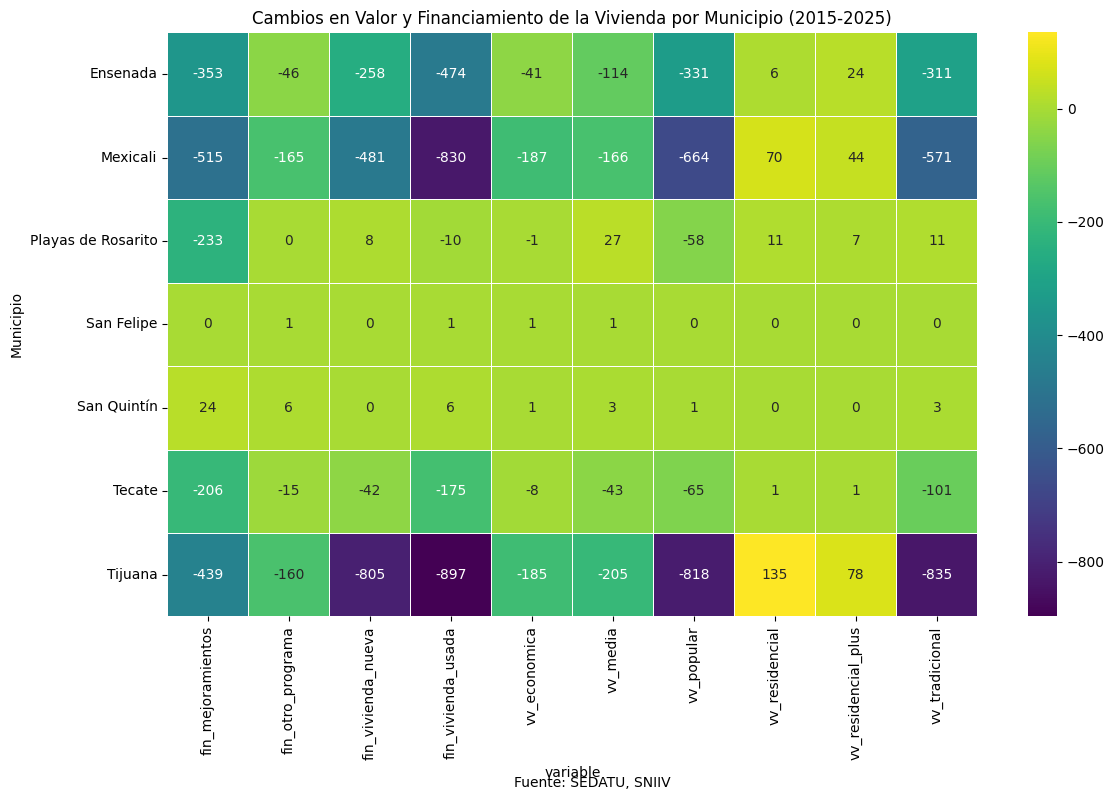

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(vivienda_diff, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)

# Add labels and title
plt.xlabel('variable')
plt.ylabel('Municipio')
plt.title('Cambios en Valor y Financiamiento de la Vivienda por Municipio (2015-2025)')
plt.tight_layout() # Adjust layout
plt.figtext(0.5, 0.01, "Fuente: SEDATU, SNIIV ", ha="center", fontsize=10)

plt.show()

### Laboral

In [ ]:
illm= pd.read_excel("/content/drive/MyDrive/ODS_8/2/ILMM/total.xlsx")

In [ ]:
illm = illm[illm['Estimador'] == 'Valor']

# integer
illm['ciclo'] = illm['ciclo'].astype(int)

# select columns
illm= illm[["ciclo","Municipio", "Población económicamente activa","Población ocupada informal" ]]

In [ ]:
# descrpibe by group
grouped_desc= illm[["Municipio", "Población económicamente activa","Población ocupada informal" ]]
grouped_desc= round(grouped_desc.groupby('Municipio').describe(),2)
desc_without_count = round(grouped_desc.drop('count', level=1, axis=1),2)
desc_without_count

Población económicamente activa                                    \
                                     mean   std    min    25%    50%    75%   
Municipio                                                                     
Ensenada                            58.81  2.25  55.55  57.11  59.04  60.44   
Mexicali                            61.32  1.32  59.06  60.54  61.50  62.12   
Playas de                           59.15  1.45  56.62  58.21  59.22  60.33   
San Quint                           60.43  2.62  57.41  59.62  61.84  61.94   
Tecate                              61.74  1.64  58.68  61.10  62.30  62.61   
Tijuana                             60.85  1.02  59.37  60.02  61.41  61.52   

                 Población ocupada informal                              \
             max                       mean    std    min    25%    50%   
Municipio                                                                 
Ensenada   61.88                      41.52   4.79  32.28  38.60  43.08   
Mexicali   62.91                      37.95   1.39  36.18  37.38  37.92   
Playas de  60.90                      50.79   5.93  40.30  48.80  51.34   
San Quint  62.04                      78.78  17.64  68.25  68.60  68.94   
Tecate     63.83                      37.52   4.40  28.46  36.53  38.28   
Tijuana    61.94                      35.14   1.58  31.48  34.98  35.72   

                         
             75%    max  
Municipio                
Ensenada   45.13  46.46  
Mexicali   38.26  40.76  
Playas de  56.09  56.46  
San Quint  84.04  99.14  
Tecate     40.21  42.57  
Tijuana    35.88  36.59

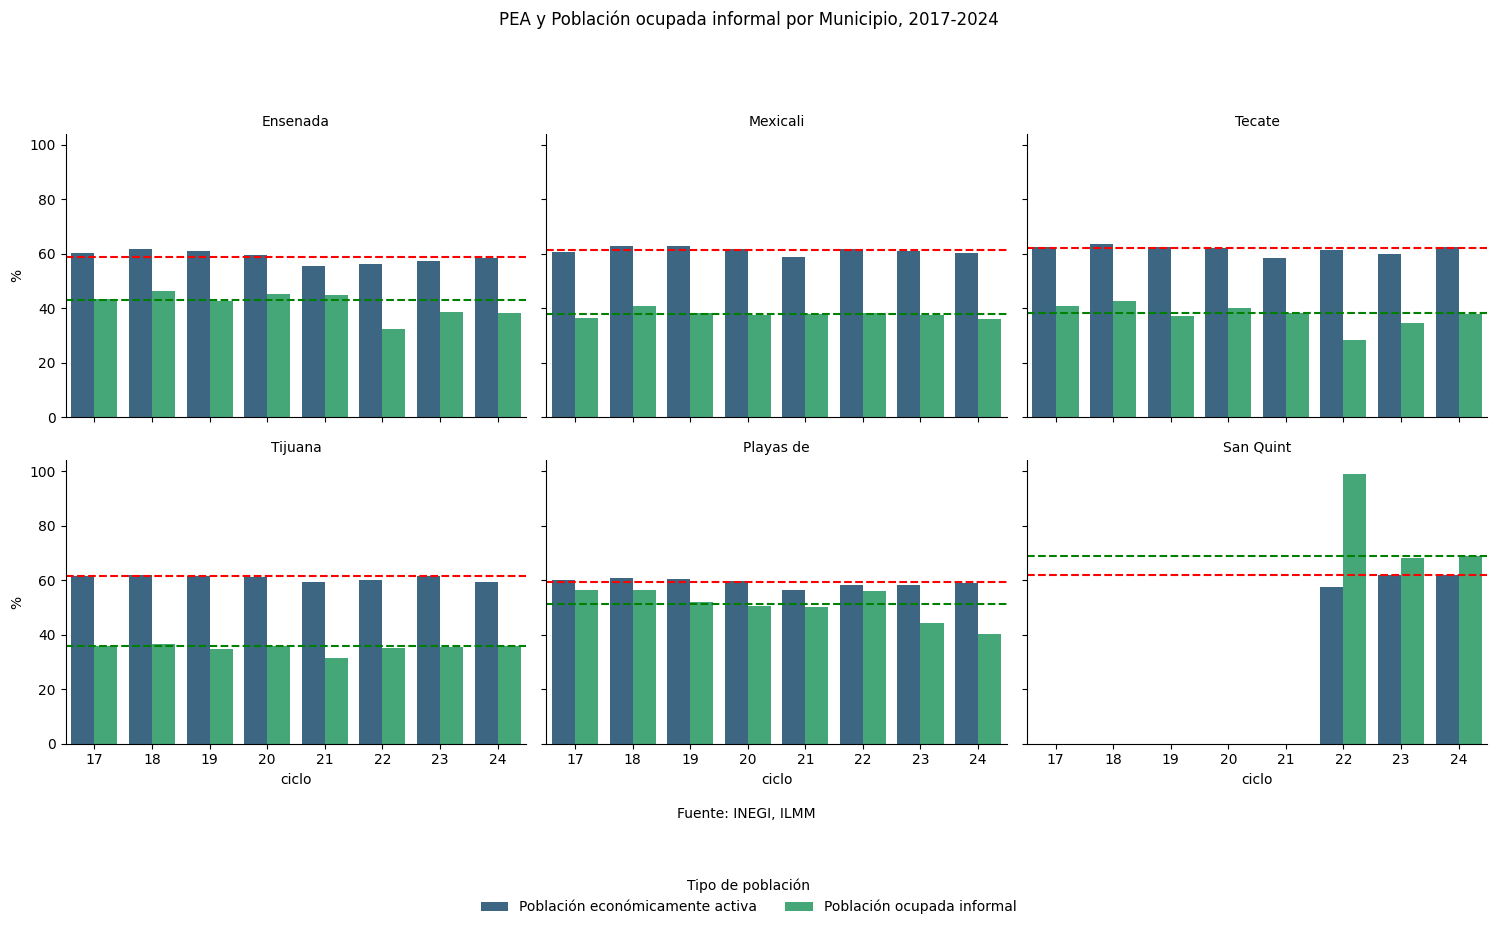

In [ ]:
# Select relevant columns and melt the DataFrame for plotting
illm_melted = illm[['ciclo', 'Municipio', "Población económicamente activa", "Población ocupada informal"]]

# Melt the data by year, municipality, and population type
illm_melted_by_municipio = illm_melted.melt(id_vars=['ciclo', 'Municipio'], var_name='Population Type', value_name='Count')

# Create a FacetGrid to plot each municipality separately with grouped bars
g = sns.FacetGrid(illm_melted_by_municipio, col='Municipio', col_wrap=3, height=4, aspect=0.8) # Adjust layout as needed

# Map a grouped bar plot onto the FacetGrid with an explicit palette
g.map_dataframe(sns.barplot, x='ciclo', y='Count', hue='Population Type', dodge=True, palette='viridis') # Added palette


# Function to add median lines and labels
def add_median_lines(data, color, **kwargs): # Added color parameter
    pop_types = data['Population Type'].unique()
    colors = ['red', 'green'] # Define colors for median lines
    for i, pop_type in enumerate(pop_types):
        median_value = data[data['Population Type'] == pop_type]['Count'].median()
        line_color = colors[i % len(colors)] # Get color for the line
        plt.axhline(y=median_value, color=line_color, linestyle='--') # Draw the line without label

        # Add text label for the median value
        #plt.text(data['ciclo'].iloc[-1], # Position text near the last year
        #         median_value,
        #         f'Median {pop_type}: {median_value:.2f}',
        #         color=line_color,
        #         ha='right', # Align text to the right of the position
        #         va='bottom', # Align text below the line
        #         fontsize=9)


# Map the median line function onto the FacetGrid
# Pass the 'Population Type' column to the mapped function to use for hue mapping
# No need to pass 'Population Type' here anymore as color is defined in the function
g.map_dataframe(add_median_lines)


# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("ciclo", "%")
g.fig.suptitle("PEA y Población ocupada informal por Municipio, 2017-2024", y=1.02) # Add a main title
plt.figtext(0.5, 0.01, "Fuente: INEGI, ILMM ", ha="center", fontsize=10)

# Add legend outside the plots (only for bars, not median lines)
# The legend for median lines is handled within add_median_lines
g.add_legend(title='Tipo de población', bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=2) # Adjusted position and columns

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for the legend

plt.show()

In [ ]:
grouped_desc= illm[['Municipio', "Población económicamente activa", "Población ocupada informal"]]
grouped_desc= round(grouped_desc.groupby('Municipio').describe(),2)

# order by std

round(grouped_desc.drop('count', level=1, axis=1),2)

Población económicamente activa                                    \
                                     mean   std    min    25%    50%    75%   
Municipio                                                                     
Ensenada                            58.81  2.25  55.55  57.11  59.04  60.44   
Mexicali                            61.32  1.32  59.06  60.54  61.50  62.12   
Playas de                           59.15  1.45  56.62  58.21  59.22  60.33   
San Quint                           60.43  2.62  57.41  59.62  61.84  61.94   
Tecate                              61.74  1.64  58.68  61.10  62.30  62.61   
Tijuana                             60.85  1.02  59.37  60.02  61.41  61.52   

                 Población ocupada informal                              \
             max                       mean    std    min    25%    50%   
Municipio                                                                 
Ensenada   61.88                      41.52   4.79  32.28  38.60  43.08   
Mexicali   62.91                      37.95   1.39  36.18  37.38  37.92   
Playas de  60.90                      50.79   5.93  40.30  48.80  51.34   
San Quint  62.04                      78.78  17.64  68.25  68.60  68.94   
Tecate     63.83                      37.52   4.40  28.46  36.53  38.28   
Tijuana    61.94                      35.14   1.58  31.48  34.98  35.72   

                         
             75%    max  
Municipio                
Ensenada   45.13  46.46  
Mexicali   38.26  40.76  
Playas de  56.09  56.46  
San Quint  84.04  99.14  
Tecate     40.21  42.57  
Tijuana    35.88  36.59